In [1]:
%load_ext autoreload
%autoreload 2

import torch
from torch import nn

import numpy as np
from sklearn.model_selection import train_test_split

from ModelHelper import *
from ModelHelper import myNeural

from hyperopt import hp
from hyperopt import fmin, tpe, hp

# Loading Data

In [2]:
trainData = DatasetRandom(size = 10000)
# trainDataLoader = DataLoader(trainData, batch_size=20, shuffle=True)

testData = DatasetRandom(size = 2000)
# testDataLoader = DataLoader(testData, batch_size=20, shuffle=True)

# Hyper-Parameter Tunning

In [3]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [ ]:
paramSpace = space = {
    # model parameters
    'hidden_size': hp.randint('hidden_size', 400, 512),
    # 'act_func_1': hp.choice('act_func_1', [nn.ReLU, nn.LeakyReLU, nn.Sigmoid, nn.Tanh]),
    # 'act_func_2': hp.choice('act_func_2', [nn.ReLU, nn.LeakyReLU, nn.Sigmoid, nn.Tanh]),
    
    # trainer parameters
    # 'optimiser': hp.choice('optimiser', [torch.optim.SGD, torch.optim.Adam, torch.optim.LBFGS]),
    'lr' : hp.uniform('lr', 0.001, 1.5),
    'epoch': hp.randint('epoch', 50),
    'batch_size': hp.randint('batch_size', 512),
}

In [ ]:
myTuner = HyperTuner(trainData, testData, myNeural)
myTuner.tunning(paramSpace = paramSpace, 
                metric='AvgTestAcc', 
                algo = tpe.suggest, 
                max_evals = 3)

In [ ]:
myModel = myNeural(hidden_size=411)

myModel.trainModel(trainData, testData,
                  lr = 0.8635413284323457,
                  epoch = 11, batch_size = 37)

In [ ]:
myModel.trainer.trainingStats

## Large search space

In [4]:
paramSpace = space = {
    # model parameters
    'hidden_size': hp.randint('hidden_size', 400, 512),
    'act_func_1': hp.choice('act_func_1', [nn.ReLU, nn.LeakyReLU, nn.Sigmoid, nn.Tanh]),
    'act_func_2': hp.choice('act_func_2', [nn.ReLU, nn.LeakyReLU, nn.Sigmoid, nn.Tanh]),
    
    # trainer parameters
    # 'optimiser': hp.choice('optimiser', [torch.optim.SGD, torch.optim.Adam, torch.optim.LBFGS]),
    'lr' : hp.uniform('lr', 0.001, 1.5),
    'epoch': hp.randint('epoch', 50),
    'batch_size': hp.randint('batch_size', 512),
}

In [5]:
myTuner = HyperTuner(trainData, testData, myNeural)
myTuner.tunning(paramSpace = paramSpace, 
                metric='AvgTestAcc', 
                algo = tpe.suggest, 
                max_evals = 5)

  0%|          | 0/5 [00:00<?, ?trial/s, best loss=?]

 20%|██        | 1/5 [00:40<02:40, 40.02s/trial, best loss: 0.7826511859893799]

 40%|████      | 2/5 [01:05<01:47, 35.80s/trial, best loss: 0.7826511859893799]

 40%|████      | 2/5 [01:26<02:09, 43.06s/trial, best loss: 0.7826511859893799]


KeyboardInterrupt: 

In [6]:
myTuner = HyperTuner(trainData, testData, myNeural)

myTuner.tunning(paramSpace = paramSpace, 
                metric='negRegAvgTestAcc', 
                algo = tpe.suggest, 
                max_evals = 3)

  0%|          | 0/3 [00:00<?, ?trial/s, best loss=?]

 33%|███▎      | 1/3 [00:34<01:08, 34.20s/trial, best loss: -0.22993230819702148]

 67%|██████▋   | 2/3 [00:51<00:29, 29.06s/trial, best loss: -0.3782569169998169] 

100%|██████████| 3/3 [01:16<00:00, 25.57s/trial, best loss: -0.3782569169998169]


{'act_func_1': 0,
 'act_func_2': 0,
 'batch_size': 111,
 'epoch': 7,
 'hidden_size': 486,
 'lr': 0.5558019007989525}

In [7]:
myModel = myNeural(hidden_size=486)

myModel.trainModel(trainData, testData,
                  lr = 0.5558019007989525,
                  epoch = 7, batch_size = 111)

In [8]:
myModel.trainer.trainingStats

{'AvgTrainLoss': tensor(0.2300, grad_fn=<DivBackward0>),
 'MaxTrainLoss': tensor(1.4552, grad_fn=<BinaryCrossEntropyWithLogitsBackward>),
 'AvgTestAcc': tensor(0.7766),
 'negAvgTestAcc': tensor(-0.7766),
 'negRegAvgTestAcc': tensor(-0.3902)}

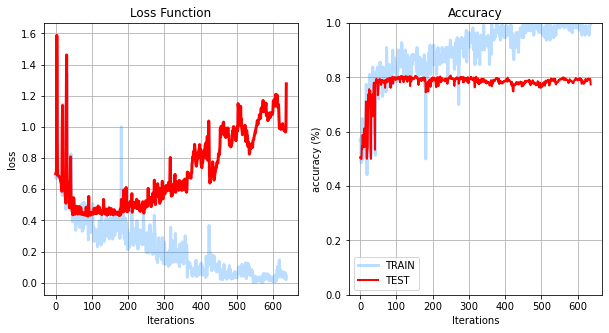

In [9]:
myModel.trainer.plotTraining()

In [11]:
paramSpace = space = {
    # model parameters
    'hidden_size': hp.choice('hidden_size', [256, 512, 1024]),
    'act_func_1': hp.choice('act_func_1', [nn.ReLU, nn.LeakyReLU,nn.Tanh]),
    'act_func_2': hp.choice('act_func_2', [nn.ReLU, nn.LeakyReLU, nn.Tanh]),
    
    # trainer parameters
    # 'optimiser': hp.choice('optimiser', [torch.optim.SGD, torch.optim.Adam, torch.optim.LBFGS]),
    'lr' : hp.uniform('lr', 0.001, 1.5),
    # 'epoch': hp.randint('epoch', 50),
    'epoch': hp.choice('epoch', [1,2,5,10,20,50]),
    # 'batch_size': hp.randint('batch_size', 512),
    'batch_size': hp.choice('batch_size', [32, 64, 128, 256, 512, 1024, 2048]),
    
}

In [12]:
myTuner = HyperTuner(trainData, testData, myNeural)

myTuner.tunning(paramSpace = paramSpace, 
                metric='negRegAvgTestAcc', 
                algo = tpe.suggest, 
                max_evals = 500)

  0%|          | 0/500 [00:00<?, ?trial/s, best loss=?]

  0%|          | 1/500 [00:03<31:27,  3.78s/trial, best loss: -0.372887521982193]

  0%|          | 2/500 [01:56<5:02:37, 36.46s/trial, best loss: -0.372887521982193]

  1%|          | 3/500 [02:01<3:43:03, 26.93s/trial, best loss: -0.372887521982193]

  1%|          | 4/500 [02:13<3:07:09, 22.64s/trial, best loss: -0.372887521982193]

  1%|          | 5/500 [02:20<2:26:22, 17.74s/trial, best loss: -0.6083170175552368]

  1%|          | 6/500 [02:22<1:48:11, 13.14s/trial, best loss: -0.6083170175552368]

  1%|▏         | 7/500 [02:27<1:28:14, 10.74s/trial, best loss: -0.6738073229789734]

  2%|▏         | 8/500 [02:29<1:06:15,  8.08s/trial, best loss: -0.6738073229789734]

  2%|▏         | 9/500 [02:47<1:31:35, 11.19s/trial, best loss: -0.6738073229789734]

  2%|▏         | 10/500 [03:10<1:58:48, 14.55s/trial, best loss: -0.6738073229789734]

  2%|▏         | 11/500 [13:17<26:08:27, 192.45s/trial, best loss: -0.6738073229789734]

  2%|▏         | 12/500 [13:30<18:47:27, 138.62s/trial, best loss: -0.6738073229789734]

  3%|▎         | 13/500 [13:31<13:09:02, 97.21s/trial, best loss: -0.6738073229789734] 

  3%|▎         | 14/500 [13:35<9:20:37, 69.21s/trial, best loss: -0.6738073229789734] 

  3%|▎         | 15/500 [20:51<24:10:18, 179.42s/trial, best loss: -0.6738073229789734]

  3%|▎         | 16/500 [31:26<42:29:30, 316.05s/trial, best loss: -0.6738073229789734]

  3%|▎         | 17/500 [34:22<36:44:32, 273.86s/trial, best loss: -0.6738073229789734]

  4%|▎         | 18/500 [34:35<26:11:10, 195.58s/trial, best loss: -0.6738073229789734]

  4%|▍         | 19/500 [40:12<31:48:32, 238.07s/trial, best loss: -0.6738073229789734]

  4%|▍         | 20/500 [40:29<22:53:32, 171.69s/trial, best loss: -0.6738073229789734]

  4%|▍         | 21/500 [40:32<16:06:32, 121.07s/trial, best loss: -0.6738073229789734]

  4%|▍         | 22/500 [40:37<11:28:34, 86.43s/trial, best loss: -0.6738073229789734] 

  5%|▍         | 23/500 [40:39<8:04:03, 60.89s/trial, best loss: -0.6738073229789734] 

  5%|▍         | 24/500 [40:44<5:50:11, 44.14s/trial, best loss: -0.6738073229789734]

  5%|▌         | 25/500 [40:45<4:07:31, 31.27s/trial, best loss: -0.6811648607254028]

  5%|▌         | 26/500 [40:51<3:08:38, 23.88s/trial, best loss: -0.6811648607254028]

  5%|▌         | 27/500 [40:52<2:12:59, 16.87s/trial, best loss: -0.6811648607254028]

  6%|▌         | 28/500 [40:53<1:35:19, 12.12s/trial, best loss: -0.6811648607254028]

  6%|▌         | 29/500 [41:06<1:37:56, 12.48s/trial, best loss: -0.6811648607254028]

  6%|▌         | 30/500 [41:07<1:11:03,  9.07s/trial, best loss: -0.6811648607254028]

  6%|▌         | 31/500 [41:15<1:07:54,  8.69s/trial, best loss: -0.6811648607254028]

  6%|▋         | 32/500 [41:16<48:40,  6.24s/trial, best loss: -0.6811648607254028]  

  7%|▋         | 33/500 [41:22<49:29,  6.36s/trial, best loss: -0.6811648607254028]

  7%|▋         | 34/500 [41:36<1:05:26,  8.42s/trial, best loss: -0.6811648607254028]

  7%|▋         | 35/500 [41:41<57:59,  7.48s/trial, best loss: -0.6811648607254028]  

  7%|▋         | 36/500 [41:42<42:55,  5.55s/trial, best loss: -0.6811648607254028]

  7%|▋         | 37/500 [41:47<42:31,  5.51s/trial, best loss: -0.6811648607254028]

  8%|▊         | 38/500 [42:00<59:11,  7.69s/trial, best loss: -0.6811648607254028]

  8%|▊         | 39/500 [42:08<59:51,  7.79s/trial, best loss: -0.6811648607254028]

  8%|▊         | 40/500 [42:49<2:15:35, 17.68s/trial, best loss: -0.6811648607254028]

  8%|▊         | 41/500 [43:08<2:19:03, 18.18s/trial, best loss: -0.6811648607254028]

  8%|▊         | 42/500 [43:09<1:37:42, 12.80s/trial, best loss: -0.6811648607254028]

  9%|▊         | 43/500 [43:14<1:20:00, 10.50s/trial, best loss: -0.6811648607254028]

  9%|▉         | 44/500 [43:17<1:03:53,  8.41s/trial, best loss: -0.6811648607254028]

  9%|▉         | 45/500 [46:00<6:55:33, 54.80s/trial, best loss: -0.6811648607254028]

  9%|▉         | 46/500 [46:05<5:01:19, 39.82s/trial, best loss: -0.6811648607254028]

  9%|▉         | 47/500 [49:29<11:13:08, 89.16s/trial, best loss: -0.6811648607254028]

 10%|▉         | 48/500 [49:32<7:55:38, 63.14s/trial, best loss: -0.6811648607254028] 

 10%|▉         | 49/500 [49:34<5:36:16, 44.74s/trial, best loss: -0.6811648607254028]

 10%|█         | 50/500 [49:46<4:23:06, 35.08s/trial, best loss: -0.6811648607254028]

 10%|█         | 51/500 [50:57<5:42:41, 45.79s/trial, best loss: -0.6811648607254028]

 10%|█         | 52/500 [51:32<5:16:43, 42.42s/trial, best loss: -0.6811648607254028]

 11%|█         | 53/500 [52:01<4:47:15, 38.56s/trial, best loss: -0.6811648607254028]

 11%|█         | 54/500 [52:05<3:30:18, 28.29s/trial, best loss: -0.6811648607254028]

 11%|█         | 55/500 [52:07<2:30:33, 20.30s/trial, best loss: -0.6811648607254028]

 11%|█         | 56/500 [52:13<1:58:12, 15.97s/trial, best loss: -0.6811648607254028]

 11%|█▏        | 57/500 [54:15<5:53:25, 47.87s/trial, best loss: -0.6811648607254028]

 12%|█▏        | 58/500 [54:17<4:09:42, 33.90s/trial, best loss: -0.6811648607254028]

 12%|█▏        | 59/500 [54:18<2:57:47, 24.19s/trial, best loss: -0.6811648607254028]

 12%|█▏        | 60/500 [54:19<2:07:08, 17.34s/trial, best loss: -0.6811648607254028]

 12%|█▏        | 61/500 [54:21<1:31:52, 12.56s/trial, best loss: -0.6811648607254028]

 12%|█▏        | 62/500 [54:22<1:05:36,  8.99s/trial, best loss: -0.6811648607254028]

 13%|█▎        | 63/500 [54:25<53:45,  7.38s/trial, best loss: -0.6811648607254028]  

 13%|█▎        | 64/500 [54:28<44:02,  6.06s/trial, best loss: -0.6811648607254028]

 13%|█▎        | 65/500 [54:32<38:59,  5.38s/trial, best loss: -0.6811648607254028]

 13%|█▎        | 66/500 [54:37<39:14,  5.43s/trial, best loss: -0.6811648607254028]

 13%|█▎        | 67/500 [54:40<33:10,  4.60s/trial, best loss: -0.6811648607254028]

 14%|█▎        | 68/500 [57:20<6:08:19, 51.16s/trial, best loss: -0.6811648607254028]

 14%|█▍        | 69/500 [57:23<4:23:36, 36.70s/trial, best loss: -0.6811648607254028]

 14%|█▍        | 70/500 [57:26<3:10:01, 26.52s/trial, best loss: -0.6811648607254028]

 14%|█▍        | 71/500 [57:28<2:18:18, 19.34s/trial, best loss: -0.6847223043441772]

 14%|█▍        | 72/500 [57:31<1:42:30, 14.37s/trial, best loss: -0.6847223043441772]

 15%|█▍        | 73/500 [57:34<1:17:25, 10.88s/trial, best loss: -0.6847223043441772]

 15%|█▍        | 74/500 [57:36<59:31,  8.38s/trial, best loss: -0.6847223043441772]  

 15%|█▌        | 75/500 [57:38<45:00,  6.35s/trial, best loss: -0.6847223043441772]

 15%|█▌        | 76/500 [57:40<35:00,  4.95s/trial, best loss: -0.6847223043441772]

 15%|█▌        | 77/500 [57:41<28:12,  4.00s/trial, best loss: -0.6847223043441772]

 16%|█▌        | 78/500 [57:42<21:23,  3.04s/trial, best loss: -0.6847223043441772]

 16%|█▌        | 79/500 [57:43<17:05,  2.44s/trial, best loss: -0.6847223043441772]

 16%|█▌        | 80/500 [57:44<14:24,  2.06s/trial, best loss: -0.6847223043441772]

 16%|█▌        | 81/500 [57:45<12:00,  1.72s/trial, best loss: -0.6868917346000671]

 16%|█▋        | 82/500 [57:46<10:16,  1.48s/trial, best loss: -0.6868917346000671]

 17%|█▋        | 83/500 [57:47<08:55,  1.28s/trial, best loss: -0.6868917346000671]

 17%|█▋        | 84/500 [57:48<08:00,  1.16s/trial, best loss: -0.6868917346000671]

 17%|█▋        | 85/500 [57:49<07:32,  1.09s/trial, best loss: -0.6868917346000671]

 17%|█▋        | 86/500 [57:53<14:10,  2.05s/trial, best loss: -0.6868917346000671]

 17%|█▋        | 87/500 [57:54<12:07,  1.76s/trial, best loss: -0.6868917346000671]

 18%|█▊        | 88/500 [59:24<3:12:50, 28.08s/trial, best loss: -0.6868917346000671]

 18%|█▊        | 89/500 [59:26<2:18:49, 20.27s/trial, best loss: -0.6868917346000671]

 18%|█▊        | 90/500 [59:41<2:08:16, 18.77s/trial, best loss: -0.6868917346000671]

 18%|█▊        | 91/500 [1:00:52<3:55:38, 34.57s/trial, best loss: -0.6868917346000671]

 18%|█▊        | 92/500 [1:00:56<2:51:56, 25.29s/trial, best loss: -0.6868917346000671]

 19%|█▊        | 93/500 [1:01:01<2:10:29, 19.24s/trial, best loss: -0.6868917346000671]

 19%|█▉        | 94/500 [1:01:21<2:11:06, 19.38s/trial, best loss: -0.6868917346000671]

 19%|█▉        | 95/500 [1:01:22<1:34:36, 14.01s/trial, best loss: -0.6868917346000671]

 19%|█▉        | 96/500 [1:01:40<1:40:45, 14.96s/trial, best loss: -0.6868917346000671]

 19%|█▉        | 97/500 [1:01:58<1:47:24, 15.99s/trial, best loss: -0.6868917346000671]

 20%|█▉        | 98/500 [1:02:15<1:48:44, 16.23s/trial, best loss: -0.6868917346000671]

 20%|█▉        | 99/500 [1:02:19<1:23:47, 12.54s/trial, best loss: -0.6868917346000671]

 20%|██        | 100/500 [1:03:01<2:24:06, 21.62s/trial, best loss: -0.6868917346000671]

 20%|██        | 101/500 [1:03:10<1:57:23, 17.65s/trial, best loss: -0.6868917346000671]

 20%|██        | 102/500 [1:03:12<1:26:54, 13.10s/trial, best loss: -0.6868917346000671]

 21%|██        | 103/500 [1:03:33<1:41:04, 15.28s/trial, best loss: -0.6868917346000671]

 21%|██        | 104/500 [1:03:41<1:26:51, 13.16s/trial, best loss: -0.6868917346000671]

 21%|██        | 105/500 [1:03:43<1:04:12,  9.75s/trial, best loss: -0.6868917346000671]

 21%|██        | 106/500 [1:06:38<6:29:10, 59.26s/trial, best loss: -0.6868917346000671]

 21%|██▏       | 107/500 [1:06:39<4:35:03, 41.99s/trial, best loss: -0.6868917346000671]

 22%|██▏       | 108/500 [1:06:48<3:28:29, 31.91s/trial, best loss: -0.6868917346000671]

 22%|██▏       | 109/500 [1:06:49<2:28:05, 22.73s/trial, best loss: -0.6868917346000671]

 22%|██▏       | 110/500 [1:07:10<2:24:15, 22.19s/trial, best loss: -0.6868917346000671]

 22%|██▏       | 111/500 [1:07:18<1:56:17, 17.94s/trial, best loss: -0.6868917346000671]

 22%|██▏       | 112/500 [1:07:34<1:52:18, 17.37s/trial, best loss: -0.6868917346000671]

 23%|██▎       | 113/500 [1:07:35<1:20:07, 12.42s/trial, best loss: -0.6868917346000671]

 23%|██▎       | 114/500 [1:11:25<8:19:44, 77.68s/trial, best loss: -0.6868917346000671]

 23%|██▎       | 115/500 [1:11:28<5:54:31, 55.25s/trial, best loss: -0.6868917346000671]

 23%|██▎       | 116/500 [1:11:43<4:37:41, 43.39s/trial, best loss: -0.6868917346000671]

 23%|██▎       | 117/500 [1:11:46<3:17:56, 31.01s/trial, best loss: -0.6868917346000671]

 24%|██▎       | 118/500 [1:11:47<2:20:42, 22.10s/trial, best loss: -0.6868917346000671]

 24%|██▍       | 119/500 [1:12:12<2:26:13, 23.03s/trial, best loss: -0.6868917346000671]

 24%|██▍       | 120/500 [1:12:14<1:45:30, 16.66s/trial, best loss: -0.6868917346000671]

 24%|██▍       | 121/500 [1:12:21<1:27:20, 13.83s/trial, best loss: -0.6868917346000671]

 24%|██▍       | 122/500 [1:13:33<3:16:14, 31.15s/trial, best loss: -0.6868917346000671]

 25%|██▍       | 123/500 [1:13:34<2:19:04, 22.13s/trial, best loss: -0.6868917346000671]

 25%|██▍       | 124/500 [1:14:12<2:48:55, 26.95s/trial, best loss: -0.6868917346000671]

 25%|██▌       | 125/500 [1:14:13<2:00:05, 19.21s/trial, best loss: -0.6868917346000671]

 25%|██▌       | 126/500 [1:14:21<1:37:54, 15.71s/trial, best loss: -0.6868917346000671]

 25%|██▌       | 127/500 [1:14:26<1:18:17, 12.59s/trial, best loss: -0.6868917346000671]

 26%|██▌       | 128/500 [1:14:50<1:39:24, 16.03s/trial, best loss: -0.6868917346000671]

 26%|██▌       | 129/500 [1:14:50<1:10:23, 11.38s/trial, best loss: -0.6868917346000671]

 26%|██▌       | 130/500 [1:14:58<1:03:40, 10.33s/trial, best loss: -0.6868917346000671]

 26%|██▌       | 131/500 [1:15:01<48:34,  7.90s/trial, best loss: -0.6868917346000671]  

 26%|██▋       | 132/500 [1:21:53<13:11:54, 129.12s/trial, best loss: -0.6868917346000671]

 27%|██▋       | 133/500 [1:22:33<10:26:28, 102.42s/trial, best loss: -0.6868917346000671]

 27%|██▋       | 134/500 [1:22:35<7:20:42, 72.25s/trial, best loss: -0.6868917346000671]  

 27%|██▋       | 135/500 [1:22:38<5:14:46, 51.75s/trial, best loss: -0.6868917346000671]

 27%|██▋       | 136/500 [1:22:49<3:59:08, 39.42s/trial, best loss: -0.6868917346000671]

 27%|██▋       | 137/500 [1:22:50<2:48:28, 27.85s/trial, best loss: -0.6868917346000671]

 28%|██▊       | 138/500 [1:22:51<2:00:01, 19.89s/trial, best loss: -0.6868917346000671]

 28%|██▊       | 139/500 [1:22:55<1:30:35, 15.06s/trial, best loss: -0.6868917346000671]

 28%|██▊       | 140/500 [1:23:04<1:19:22, 13.23s/trial, best loss: -0.6868917346000671]

 28%|██▊       | 141/500 [1:23:53<2:24:10, 24.10s/trial, best loss: -0.6868917346000671]

 28%|██▊       | 142/500 [1:24:00<1:53:01, 18.94s/trial, best loss: -0.6868917346000671]

 29%|██▊       | 143/500 [1:24:07<1:30:47, 15.26s/trial, best loss: -0.6868917346000671]

 29%|██▉       | 144/500 [1:24:09<1:06:19, 11.18s/trial, best loss: -0.6868917346000671]

 29%|██▉       | 145/500 [1:28:31<8:31:47, 86.50s/trial, best loss: -0.6868917346000671]

 29%|██▉       | 146/500 [1:28:34<6:01:51, 61.33s/trial, best loss: -0.6868917346000671]

 29%|██▉       | 147/500 [1:28:35<4:14:59, 43.34s/trial, best loss: -0.6868917346000671]

 30%|██▉       | 148/500 [1:28:36<3:00:21, 30.74s/trial, best loss: -0.6868917346000671]

 30%|██▉       | 149/500 [1:28:38<2:08:12, 21.92s/trial, best loss: -0.6868917346000671]

 30%|███       | 150/500 [1:28:39<1:31:50, 15.75s/trial, best loss: -0.6868917346000671]

 30%|███       | 151/500 [1:28:40<1:06:27, 11.42s/trial, best loss: -0.6868917346000671]

 30%|███       | 152/500 [1:28:42<48:44,  8.40s/trial, best loss: -0.6868917346000671]  

 31%|███       | 153/500 [1:28:43<36:26,  6.30s/trial, best loss: -0.6868917346000671]

 31%|███       | 154/500 [1:28:44<27:44,  4.81s/trial, best loss: -0.6868917346000671]

 31%|███       | 155/500 [1:28:45<20:17,  3.53s/trial, best loss: -0.6868917346000671]

 31%|███       | 156/500 [1:28:46<16:39,  2.91s/trial, best loss: -0.6868917346000671]

 31%|███▏      | 157/500 [1:28:48<14:46,  2.59s/trial, best loss: -0.6868917346000671]

 32%|███▏      | 158/500 [1:28:50<13:29,  2.37s/trial, best loss: -0.6868917346000671]

 32%|███▏      | 159/500 [1:28:52<12:43,  2.24s/trial, best loss: -0.6868917346000671]

 32%|███▏      | 160/500 [1:28:54<12:25,  2.19s/trial, best loss: -0.6868917346000671]

 32%|███▏      | 161/500 [1:28:55<10:21,  1.83s/trial, best loss: -0.6868917346000671]

 32%|███▏      | 162/500 [1:28:57<10:56,  1.94s/trial, best loss: -0.6868917346000671]

 33%|███▎      | 163/500 [1:28:59<11:15,  2.00s/trial, best loss: -0.6868917346000671]

 33%|███▎      | 164/500 [1:29:00<09:31,  1.70s/trial, best loss: -0.6868917346000671]

 33%|███▎      | 165/500 [1:29:02<10:10,  1.82s/trial, best loss: -0.6868917346000671]

 33%|███▎      | 166/500 [1:29:09<17:42,  3.18s/trial, best loss: -0.6868917346000671]

 33%|███▎      | 167/500 [1:29:11<15:56,  2.87s/trial, best loss: -0.6868917346000671]

 34%|███▎      | 168/500 [1:29:12<12:14,  2.21s/trial, best loss: -0.6868917346000671]

 34%|███▍      | 169/500 [1:29:37<50:50,  9.22s/trial, best loss: -0.6868917346000671]

 34%|███▍      | 170/500 [1:30:00<1:12:45, 13.23s/trial, best loss: -0.6868917346000671]

 34%|███▍      | 171/500 [1:30:16<1:17:42, 14.17s/trial, best loss: -0.6868917346000671]

 34%|███▍      | 172/500 [1:30:20<1:01:01, 11.16s/trial, best loss: -0.6868917346000671]

 35%|███▍      | 173/500 [1:30:23<46:52,  8.60s/trial, best loss: -0.6868917346000671]  

 35%|███▍      | 174/500 [1:30:58<1:29:03, 16.39s/trial, best loss: -0.6868917346000671]

 35%|███▌      | 175/500 [1:30:59<1:04:47, 11.96s/trial, best loss: -0.6868917346000671]

 35%|███▌      | 176/500 [1:31:00<47:11,  8.74s/trial, best loss: -0.6868917346000671]  

 35%|███▌      | 177/500 [1:31:04<39:05,  7.26s/trial, best loss: -0.6868917346000671]

 36%|███▌      | 178/500 [1:31:09<34:16,  6.39s/trial, best loss: -0.6868917346000671]

 36%|███▌      | 179/500 [1:52:09<34:06:15, 382.48s/trial, best loss: -0.6868917346000671]

 36%|███▌      | 180/500 [1:52:14<23:56:09, 269.28s/trial, best loss: -0.6868917346000671]

 36%|███▌      | 181/500 [1:52:18<16:48:50, 189.75s/trial, best loss: -0.6868917346000671]

 36%|███▋      | 182/500 [1:52:19<11:45:45, 133.16s/trial, best loss: -0.6868917346000671]

 37%|███▋      | 183/500 [1:52:21<8:16:06, 93.90s/trial, best loss: -0.6868917346000671]  

 37%|███▋      | 184/500 [1:52:30<5:59:52, 68.33s/trial, best loss: -0.6868917346000671]

 37%|███▋      | 185/500 [1:52:35<4:19:26, 49.42s/trial, best loss: -0.6868917346000671]

 37%|███▋      | 186/500 [1:53:18<4:07:56, 47.38s/trial, best loss: -0.6868917346000671]

 37%|███▋      | 187/500 [1:54:02<4:01:59, 46.39s/trial, best loss: -0.6868917346000671]

 38%|███▊      | 188/500 [1:54:03<2:50:13, 32.74s/trial, best loss: -0.6868917346000671]

 38%|███▊      | 189/500 [1:54:25<2:33:28, 29.61s/trial, best loss: -0.6868917346000671]

 38%|███▊      | 190/500 [1:54:42<2:12:40, 25.68s/trial, best loss: -0.6868917346000671]

 38%|███▊      | 191/500 [1:54:43<1:34:02, 18.26s/trial, best loss: -0.6932406425476074]

 38%|███▊      | 192/500 [1:54:48<1:14:11, 14.45s/trial, best loss: -0.6932406425476074]

 39%|███▊      | 193/500 [1:54:49<53:02, 10.37s/trial, best loss: -0.6932406425476074]  

 39%|███▉      | 194/500 [1:54:50<37:57,  7.44s/trial, best loss: -0.6932406425476074]

 39%|███▉      | 195/500 [1:54:51<28:11,  5.54s/trial, best loss: -0.6932406425476074]

 39%|███▉      | 196/500 [1:55:01<35:14,  6.95s/trial, best loss: -0.6932406425476074]

 39%|███▉      | 197/500 [1:55:22<55:53, 11.07s/trial, best loss: -0.6932406425476074]

 40%|███▉      | 198/500 [1:55:29<49:38,  9.86s/trial, best loss: -0.6932406425476074]

 40%|███▉      | 199/500 [1:55:39<50:18, 10.03s/trial, best loss: -0.6932406425476074]

 40%|████      | 200/500 [1:55:40<36:32,  7.31s/trial, best loss: -0.6932406425476074]

 40%|████      | 201/500 [1:55:46<33:55,  6.81s/trial, best loss: -0.6932406425476074]

 40%|████      | 202/500 [1:55:47<24:55,  5.02s/trial, best loss: -0.6932406425476074]

 41%|████      | 203/500 [1:55:47<18:37,  3.76s/trial, best loss: -0.6932406425476074]

 41%|████      | 204/500 [1:55:48<13:58,  2.83s/trial, best loss: -0.6932406425476074]

 41%|████      | 205/500 [1:55:54<18:41,  3.80s/trial, best loss: -0.6932406425476074]

 41%|████      | 206/500 [1:56:44<1:26:40, 17.69s/trial, best loss: -0.6932406425476074]

 41%|████▏     | 207/500 [1:56:45<1:01:39, 12.63s/trial, best loss: -0.6932406425476074]

 42%|████▏     | 208/500 [1:56:53<54:55, 11.29s/trial, best loss: -0.6932406425476074]  

 42%|████▏     | 209/500 [1:56:55<41:31,  8.56s/trial, best loss: -0.6932406425476074]

 42%|████▏     | 210/500 [1:58:03<2:06:40, 26.21s/trial, best loss: -0.6932406425476074]

 42%|████▏     | 211/500 [1:58:03<1:29:15, 18.53s/trial, best loss: -0.6932406425476074]

 42%|████▏     | 212/500 [1:58:30<1:40:01, 20.84s/trial, best loss: -0.6932406425476074]

 43%|████▎     | 213/500 [1:58:30<1:10:51, 14.81s/trial, best loss: -0.6932406425476074]

 43%|████▎     | 214/500 [1:58:36<58:07, 12.19s/trial, best loss: -0.6932406425476074]  

 43%|████▎     | 215/500 [2:00:45<3:43:09, 46.98s/trial, best loss: -0.6932406425476074]

 43%|████▎     | 216/500 [2:00:45<2:36:30, 33.07s/trial, best loss: -0.6932406425476074]

 43%|████▎     | 217/500 [2:00:50<1:55:55, 24.58s/trial, best loss: -0.6932406425476074]

 44%|████▎     | 218/500 [2:00:51<1:22:00, 17.45s/trial, best loss: -0.6932406425476074]

 44%|████▍     | 219/500 [2:08:54<12:15:44, 157.10s/trial, best loss: -0.6932406425476074]

 44%|████▍     | 220/500 [2:08:56<8:35:41, 110.51s/trial, best loss: -0.6932406425476074] 

 44%|████▍     | 221/500 [2:08:56<6:00:53, 77.61s/trial, best loss: -0.6932406425476074] 

 44%|████▍     | 222/500 [2:09:00<4:16:37, 55.39s/trial, best loss: -0.6932406425476074]

 45%|████▍     | 223/500 [2:09:13<3:17:39, 42.82s/trial, best loss: -0.6932406425476074]

 45%|████▍     | 224/500 [2:09:33<2:44:59, 35.87s/trial, best loss: -0.6932406425476074]

 45%|████▌     | 225/500 [2:09:36<1:58:40, 25.89s/trial, best loss: -0.6932406425476074]

 45%|████▌     | 226/500 [2:09:36<1:23:50, 18.36s/trial, best loss: -0.6932406425476074]

 45%|████▌     | 227/500 [2:09:38<1:00:08, 13.22s/trial, best loss: -0.6932406425476074]

 46%|████▌     | 228/500 [2:09:49<57:19, 12.65s/trial, best loss: -0.6932406425476074]  

 46%|████▌     | 229/500 [2:09:50<41:04,  9.09s/trial, best loss: -0.6932406425476074]

 46%|████▌     | 230/500 [2:10:41<1:37:45, 21.72s/trial, best loss: -0.6932406425476074]

 46%|████▌     | 231/500 [2:11:09<1:46:19, 23.71s/trial, best loss: -0.6932406425476074]

 46%|████▋     | 232/500 [2:11:13<1:19:19, 17.76s/trial, best loss: -0.6932406425476074]

 47%|████▋     | 233/500 [2:19:05<11:24:53, 153.91s/trial, best loss: -0.6932406425476074]

 47%|████▋     | 234/500 [2:19:05<7:58:24, 107.91s/trial, best loss: -0.6932406425476074] 

 47%|████▋     | 235/500 [2:19:10<5:39:23, 76.84s/trial, best loss: -0.6932406425476074] 

 47%|████▋     | 236/500 [2:19:11<3:58:22, 54.18s/trial, best loss: -0.6932406425476074]

 47%|████▋     | 237/500 [2:19:16<2:52:50, 39.43s/trial, best loss: -0.6932406425476074]

 48%|████▊     | 238/500 [2:19:30<2:19:25, 31.93s/trial, best loss: -0.6932406425476074]

 48%|████▊     | 239/500 [2:19:33<1:40:01, 22.99s/trial, best loss: -0.6932406425476074]

 48%|████▊     | 240/500 [2:19:35<1:12:13, 16.67s/trial, best loss: -0.6932406425476074]

 48%|████▊     | 241/500 [2:20:10<1:36:41, 22.40s/trial, best loss: -0.6932406425476074]

 48%|████▊     | 242/500 [2:20:13<1:10:57, 16.50s/trial, best loss: -0.6932406425476074]

 49%|████▊     | 243/500 [2:20:34<1:16:58, 17.97s/trial, best loss: -0.6932406425476074]

 49%|████▉     | 244/500 [2:20:39<59:18, 13.90s/trial, best loss: -0.6932406425476074]  

 49%|████▉     | 245/500 [2:20:46<50:17, 11.83s/trial, best loss: -0.6932406425476074]

 49%|████▉     | 246/500 [2:20:47<36:14,  8.56s/trial, best loss: -0.6932406425476074]

 49%|████▉     | 247/500 [2:20:50<29:04,  6.89s/trial, best loss: -0.6932406425476074]

 50%|████▉     | 248/500 [2:20:59<31:45,  7.56s/trial, best loss: -0.6932406425476074]

 50%|████▉     | 249/500 [2:21:00<23:43,  5.67s/trial, best loss: -0.6932406425476074]

 50%|█████     | 250/500 [2:21:02<19:12,  4.61s/trial, best loss: -0.6932406425476074]

 50%|█████     | 251/500 [2:21:11<23:43,  5.72s/trial, best loss: -0.6932406425476074]

 50%|█████     | 252/500 [2:21:57<1:14:06, 17.93s/trial, best loss: -0.6932406425476074]

 51%|█████     | 253/500 [2:21:58<52:27, 12.74s/trial, best loss: -0.6956837177276611]  

 51%|█████     | 254/500 [2:21:58<37:07,  9.05s/trial, best loss: -0.6966124176979065]

 51%|█████     | 255/500 [2:21:59<26:38,  6.52s/trial, best loss: -0.6966124176979065]

 51%|█████     | 256/500 [2:22:01<20:47,  5.11s/trial, best loss: -0.6966124176979065]

 51%|█████▏    | 257/500 [2:22:01<14:51,  3.67s/trial, best loss: -0.6966124176979065]

 52%|█████▏    | 258/500 [2:22:01<10:53,  2.70s/trial, best loss: -0.6966124176979065]

 52%|█████▏    | 259/500 [2:22:02<08:07,  2.02s/trial, best loss: -0.6966124176979065]

 52%|█████▏    | 260/500 [2:22:02<06:11,  1.55s/trial, best loss: -0.6966124176979065]

 52%|█████▏    | 261/500 [2:22:03<04:50,  1.21s/trial, best loss: -0.6966124176979065]

 52%|█████▏    | 262/500 [2:22:03<03:53,  1.02trial/s, best loss: -0.6966124176979065]

 53%|█████▎    | 263/500 [2:22:03<03:14,  1.22trial/s, best loss: -0.6966124176979065]

 53%|█████▎    | 264/500 [2:22:04<02:47,  1.41trial/s, best loss: -0.6966124176979065]

 53%|█████▎    | 265/500 [2:22:04<02:27,  1.59trial/s, best loss: -0.6990517973899841]

 53%|█████▎    | 266/500 [2:22:05<02:13,  1.75trial/s, best loss: -0.6990517973899841]

 53%|█████▎    | 267/500 [2:22:05<02:04,  1.87trial/s, best loss: -0.6990517973899841]

 54%|█████▎    | 268/500 [2:22:06<01:57,  1.98trial/s, best loss: -0.6990517973899841]

 54%|█████▍    | 269/500 [2:22:06<01:52,  2.06trial/s, best loss: -0.6990517973899841]

 54%|█████▍    | 270/500 [2:22:07<01:48,  2.11trial/s, best loss: -0.6990517973899841]

 54%|█████▍    | 271/500 [2:22:07<01:46,  2.16trial/s, best loss: -0.6990517973899841]

 54%|█████▍    | 272/500 [2:22:07<01:44,  2.19trial/s, best loss: -0.6990517973899841]

 55%|█████▍    | 273/500 [2:22:08<01:42,  2.21trial/s, best loss: -0.6990517973899841]

 55%|█████▍    | 274/500 [2:22:09<01:55,  1.96trial/s, best loss: -0.6990517973899841]

 55%|█████▌    | 275/500 [2:22:09<01:50,  2.04trial/s, best loss: -0.7017589807510376]

 55%|█████▌    | 276/500 [2:22:09<01:39,  2.24trial/s, best loss: -0.7017589807510376]

 55%|█████▌    | 277/500 [2:22:10<02:21,  1.58trial/s, best loss: -0.7017589807510376]

 56%|█████▌    | 278/500 [2:22:11<02:08,  1.73trial/s, best loss: -0.7017589807510376]

 56%|█████▌    | 279/500 [2:22:15<05:39,  1.54s/trial, best loss: -0.7017589807510376]

 56%|█████▌    | 280/500 [2:22:15<04:51,  1.33s/trial, best loss: -0.7017589807510376]

 56%|█████▌    | 281/500 [2:22:16<04:06,  1.12s/trial, best loss: -0.7017589807510376]

 56%|█████▋    | 282/500 [2:22:18<04:50,  1.33s/trial, best loss: -0.7017589807510376]

 57%|█████▋    | 283/500 [2:22:18<03:42,  1.02s/trial, best loss: -0.7017589807510376]

 57%|█████▋    | 284/500 [2:22:19<03:03,  1.18trial/s, best loss: -0.7017589807510376]

 57%|█████▋    | 285/500 [2:22:19<02:37,  1.37trial/s, best loss: -0.7017589807510376]

 57%|█████▋    | 286/500 [2:22:20<02:31,  1.42trial/s, best loss: -0.7017589807510376]

 57%|█████▋    | 287/500 [2:22:20<02:21,  1.50trial/s, best loss: -0.7017589807510376]

 58%|█████▊    | 288/500 [2:22:21<02:01,  1.75trial/s, best loss: -0.7017589807510376]

 58%|█████▊    | 289/500 [2:22:22<02:30,  1.40trial/s, best loss: -0.7017589807510376]

 58%|█████▊    | 290/500 [2:22:22<02:13,  1.57trial/s, best loss: -0.7017589807510376]

 58%|█████▊    | 291/500 [2:22:26<05:21,  1.54s/trial, best loss: -0.7017589807510376]

 58%|█████▊    | 292/500 [2:22:26<04:24,  1.27s/trial, best loss: -0.7017589807510376]

 59%|█████▊    | 293/500 [2:22:27<03:32,  1.02s/trial, best loss: -0.7017589807510376]

 59%|█████▉    | 294/500 [2:22:29<04:25,  1.29s/trial, best loss: -0.7017589807510376]

 59%|█████▉    | 295/500 [2:22:29<03:23,  1.01trial/s, best loss: -0.7017589807510376]

 59%|█████▉    | 296/500 [2:22:30<02:49,  1.21trial/s, best loss: -0.7017589807510376]

 59%|█████▉    | 297/500 [2:22:30<02:25,  1.40trial/s, best loss: -0.7017589807510376]

 60%|█████▉    | 298/500 [2:22:31<02:21,  1.42trial/s, best loss: -0.7017589807510376]

 60%|█████▉    | 299/500 [2:22:31<01:59,  1.68trial/s, best loss: -0.7017589807510376]

 60%|██████    | 300/500 [2:22:32<01:50,  1.81trial/s, best loss: -0.7017589807510376]

 60%|██████    | 301/500 [2:22:33<02:17,  1.45trial/s, best loss: -0.7017589807510376]

 60%|██████    | 302/500 [2:22:33<02:10,  1.52trial/s, best loss: -0.7017589807510376]

 61%|██████    | 303/500 [2:22:37<04:52,  1.49s/trial, best loss: -0.7017589807510376]

 61%|██████    | 304/500 [2:22:37<04:02,  1.24s/trial, best loss: -0.7017589807510376]

 61%|██████    | 305/500 [2:22:38<03:14,  1.00trial/s, best loss: -0.7017589807510376]

 61%|██████    | 306/500 [2:22:39<04:02,  1.25s/trial, best loss: -0.7017589807510376]

 61%|██████▏   | 307/500 [2:22:40<03:05,  1.04trial/s, best loss: -0.7017589807510376]

 62%|██████▏   | 308/500 [2:22:40<02:35,  1.24trial/s, best loss: -0.7017589807510376]

 62%|██████▏   | 309/500 [2:22:41<02:13,  1.43trial/s, best loss: -0.7017589807510376]

 62%|██████▏   | 310/500 [2:22:41<02:10,  1.45trial/s, best loss: -0.7017589807510376]

 62%|██████▏   | 311/500 [2:22:42<02:01,  1.55trial/s, best loss: -0.7017589807510376]

 62%|██████▏   | 312/500 [2:22:50<08:37,  2.75s/trial, best loss: -0.7017589807510376]

 63%|██████▎   | 313/500 [2:22:50<06:20,  2.03s/trial, best loss: -0.7017589807510376]

 63%|██████▎   | 314/500 [2:22:50<04:49,  1.55s/trial, best loss: -0.7017589807510376]

 63%|██████▎   | 315/500 [2:22:54<06:46,  2.20s/trial, best loss: -0.7017589807510376]

 63%|██████▎   | 316/500 [2:22:55<05:19,  1.74s/trial, best loss: -0.7017589807510376]

 63%|██████▎   | 317/500 [2:22:55<04:08,  1.36s/trial, best loss: -0.7080234289169312]

 64%|██████▎   | 318/500 [2:23:16<21:44,  7.17s/trial, best loss: -0.7080234289169312]

 64%|██████▍   | 319/500 [2:23:30<27:49,  9.23s/trial, best loss: -0.7080234289169312]

 64%|██████▍   | 320/500 [2:23:30<19:51,  6.62s/trial, best loss: -0.7080234289169312]

 64%|██████▍   | 321/500 [2:23:31<14:20,  4.81s/trial, best loss: -0.7080234289169312]

 64%|██████▍   | 322/500 [2:23:40<17:47,  6.00s/trial, best loss: -0.7080234289169312]

 65%|██████▍   | 323/500 [2:23:40<12:54,  4.37s/trial, best loss: -0.7080234289169312]

 65%|██████▍   | 324/500 [2:23:41<09:22,  3.20s/trial, best loss: -0.7080234289169312]

 65%|██████▌   | 325/500 [2:23:45<10:07,  3.47s/trial, best loss: -0.7080234289169312]

 65%|██████▌   | 326/500 [2:23:47<09:08,  3.15s/trial, best loss: -0.7080234289169312]

 65%|██████▌   | 327/500 [2:24:08<23:59,  8.32s/trial, best loss: -0.7080234289169312]

 66%|██████▌   | 328/500 [2:24:08<17:04,  5.96s/trial, best loss: -0.7080234289169312]

 66%|██████▌   | 329/500 [2:24:10<13:38,  4.79s/trial, best loss: -0.7080234289169312]

 66%|██████▌   | 330/500 [2:24:11<09:52,  3.49s/trial, best loss: -0.7080234289169312]

 66%|██████▌   | 331/500 [2:24:19<13:38,  4.85s/trial, best loss: -0.7080234289169312]

 66%|██████▋   | 332/500 [2:24:19<09:52,  3.53s/trial, best loss: -0.7080234289169312]

 67%|██████▋   | 333/500 [2:24:32<17:50,  6.41s/trial, best loss: -0.7080234289169312]

 67%|██████▋   | 334/500 [2:24:33<12:39,  4.58s/trial, best loss: -0.7080234289169312]

 67%|██████▋   | 335/500 [2:24:37<12:24,  4.51s/trial, best loss: -0.7080234289169312]

 67%|██████▋   | 336/500 [2:24:37<09:00,  3.30s/trial, best loss: -0.7080234289169312]

 67%|██████▋   | 337/500 [2:24:58<23:00,  8.47s/trial, best loss: -0.7080234289169312]

 68%|██████▊   | 338/500 [2:24:58<16:17,  6.03s/trial, best loss: -0.7080234289169312]

 68%|██████▊   | 339/500 [2:25:03<15:21,  5.72s/trial, best loss: -0.7080234289169312]

 68%|██████▊   | 340/500 [2:25:06<12:35,  4.72s/trial, best loss: -0.7080234289169312]

 68%|██████▊   | 341/500 [2:26:17<1:05:49, 24.84s/trial, best loss: -0.7080234289169312]

 68%|██████▊   | 342/500 [2:26:18<46:06, 17.51s/trial, best loss: -0.7080234289169312]  

 69%|██████▊   | 343/500 [2:26:18<32:24, 12.39s/trial, best loss: -0.7080234289169312]

 69%|██████▉   | 344/500 [2:26:37<37:06, 14.27s/trial, best loss: -0.7080234289169312]

 69%|██████▉   | 345/500 [2:26:37<26:02, 10.08s/trial, best loss: -0.7080234289169312]

 69%|██████▉   | 346/500 [2:26:38<18:26,  7.18s/trial, best loss: -0.7080234289169312]

 69%|██████▉   | 347/500 [2:29:08<2:07:49, 50.13s/trial, best loss: -0.7080234289169312]

 70%|██████▉   | 348/500 [2:29:08<1:29:12, 35.22s/trial, best loss: -0.7080234289169312]

 70%|██████▉   | 349/500 [2:29:10<1:03:06, 25.08s/trial, best loss: -0.7080234289169312]

 70%|███████   | 350/500 [2:29:11<44:40, 17.87s/trial, best loss: -0.7080234289169312]  

 70%|███████   | 351/500 [2:29:19<37:22, 15.05s/trial, best loss: -0.7080234289169312]

 70%|███████   | 352/500 [2:29:23<28:35, 11.59s/trial, best loss: -0.7080234289169312]

 71%|███████   | 353/500 [2:29:23<20:10,  8.24s/trial, best loss: -0.7080234289169312]

 71%|███████   | 354/500 [2:31:40<1:53:36, 46.69s/trial, best loss: -0.7080234289169312]

 71%|███████   | 355/500 [2:31:41<1:19:32, 32.92s/trial, best loss: -0.7080234289169312]

 71%|███████   | 356/500 [2:31:41<55:37, 23.18s/trial, best loss: -0.7080234289169312]  

 71%|███████▏  | 357/500 [2:31:55<48:37, 20.40s/trial, best loss: -0.7080234289169312]

 72%|███████▏  | 358/500 [2:31:55<34:07, 14.42s/trial, best loss: -0.7080234289169312]

 72%|███████▏  | 359/500 [2:31:57<25:09, 10.71s/trial, best loss: -0.7080234289169312]

 72%|███████▏  | 360/500 [2:31:58<17:43,  7.60s/trial, best loss: -0.7080234289169312]

 72%|███████▏  | 361/500 [2:34:14<1:47:21, 46.34s/trial, best loss: -0.7080234289169312]

 72%|███████▏  | 362/500 [2:34:15<1:14:55, 32.58s/trial, best loss: -0.7080234289169312]

 73%|███████▎  | 363/500 [2:34:18<54:25, 23.84s/trial, best loss: -0.7080234289169312]  

 73%|███████▎  | 364/500 [2:34:22<40:32, 17.89s/trial, best loss: -0.7080234289169312]

 73%|███████▎  | 365/500 [2:34:23<28:28, 12.65s/trial, best loss: -0.7080234289169312]

 73%|███████▎  | 366/500 [2:34:25<21:00,  9.41s/trial, best loss: -0.7080234289169312]

 73%|███████▎  | 367/500 [2:34:39<23:48, 10.74s/trial, best loss: -0.7080234289169312]

 74%|███████▎  | 368/500 [2:34:41<18:08,  8.25s/trial, best loss: -0.7080234289169312]

 74%|███████▍  | 369/500 [2:34:41<12:53,  5.91s/trial, best loss: -0.7080234289169312]

 74%|███████▍  | 370/500 [2:34:43<09:57,  4.60s/trial, best loss: -0.7080234289169312]

 74%|███████▍  | 371/500 [2:34:51<12:02,  5.60s/trial, best loss: -0.7080234289169312]

 74%|███████▍  | 372/500 [2:34:52<09:01,  4.23s/trial, best loss: -0.7080234289169312]

 75%|███████▍  | 373/500 [2:34:52<06:33,  3.10s/trial, best loss: -0.7080234289169312]

 75%|███████▍  | 374/500 [2:34:56<06:43,  3.20s/trial, best loss: -0.7080234289169312]

 75%|███████▌  | 375/500 [2:35:23<21:27, 10.30s/trial, best loss: -0.7080234289169312]

 75%|███████▌  | 376/500 [2:35:23<15:10,  7.35s/trial, best loss: -0.7080234289169312]

 75%|███████▌  | 377/500 [2:36:56<1:07:30, 32.93s/trial, best loss: -0.7080234289169312]

 76%|███████▌  | 378/500 [2:36:56<47:03, 23.14s/trial, best loss: -0.7080234289169312]  

 76%|███████▌  | 379/500 [2:36:58<33:54, 16.82s/trial, best loss: -0.7080234289169312]

 76%|███████▌  | 380/500 [2:36:59<24:02, 12.02s/trial, best loss: -0.7080234289169312]

 76%|███████▌  | 381/500 [2:36:59<16:57,  8.55s/trial, best loss: -0.7080234289169312]

 76%|███████▋  | 382/500 [2:40:05<2:01:18, 61.68s/trial, best loss: -0.7080234289169312]

 77%|███████▋  | 383/500 [2:40:06<1:24:41, 43.43s/trial, best loss: -0.7080234289169312]

 77%|███████▋  | 384/500 [2:40:06<59:01, 30.53s/trial, best loss: -0.7080234289169312]  

 77%|███████▋  | 385/500 [2:40:44<1:02:39, 32.69s/trial, best loss: -0.7080234289169312]

 77%|███████▋  | 386/500 [2:40:45<43:44, 23.02s/trial, best loss: -0.7080234289169312]  

 77%|███████▋  | 387/500 [2:40:45<30:36, 16.26s/trial, best loss: -0.7080234289169312]

 78%|███████▊  | 388/500 [2:42:28<1:18:38, 42.13s/trial, best loss: -0.7080234289169312]

 78%|███████▊  | 389/500 [2:42:34<58:00, 31.35s/trial, best loss: -0.7080234289169312]  

 78%|███████▊  | 390/500 [2:42:34<40:27, 22.06s/trial, best loss: -0.7080234289169312]

 78%|███████▊  | 391/500 [2:42:34<28:15, 15.56s/trial, best loss: -0.7080234289169312]

 78%|███████▊  | 392/500 [2:42:43<24:19, 13.51s/trial, best loss: -0.7080234289169312]

 79%|███████▊  | 393/500 [2:42:43<17:01,  9.54s/trial, best loss: -0.7080234289169312]

 79%|███████▉  | 394/500 [2:42:44<12:00,  6.79s/trial, best loss: -0.7080234289169312]

 79%|███████▉  | 395/500 [2:42:47<10:09,  5.80s/trial, best loss: -0.7080234289169312]

 79%|███████▉  | 396/500 [2:42:48<07:33,  4.36s/trial, best loss: -0.7080234289169312]

 79%|███████▉  | 397/500 [2:43:11<17:00,  9.91s/trial, best loss: -0.7080234289169312]

 80%|███████▉  | 398/500 [2:43:29<20:50, 12.26s/trial, best loss: -0.7080234289169312]

 80%|███████▉  | 399/500 [2:43:31<15:14,  9.05s/trial, best loss: -0.7080234289169312]

 80%|████████  | 400/500 [2:43:33<11:38,  6.99s/trial, best loss: -0.7080234289169312]

 80%|████████  | 401/500 [2:43:33<08:12,  4.97s/trial, best loss: -0.7080234289169312]

 80%|████████  | 402/500 [2:43:33<05:54,  3.62s/trial, best loss: -0.7080234289169312]

 81%|████████  | 403/500 [2:43:34<04:21,  2.69s/trial, best loss: -0.7080234289169312]

 81%|████████  | 404/500 [2:43:35<03:16,  2.05s/trial, best loss: -0.7080234289169312]

 81%|████████  | 405/500 [2:43:35<02:31,  1.60s/trial, best loss: -0.7080234289169312]

 81%|████████  | 406/500 [2:43:36<02:01,  1.30s/trial, best loss: -0.7080234289169312]

 81%|████████▏ | 407/500 [2:43:36<01:41,  1.09s/trial, best loss: -0.7080234289169312]

 82%|████████▏ | 408/500 [2:43:37<01:26,  1.07trial/s, best loss: -0.7080234289169312]

 82%|████████▏ | 409/500 [2:43:37<01:13,  1.24trial/s, best loss: -0.7080234289169312]

 82%|████████▏ | 410/500 [2:43:38<01:04,  1.40trial/s, best loss: -0.7080234289169312]

 82%|████████▏ | 411/500 [2:43:38<00:57,  1.54trial/s, best loss: -0.7080234289169312]

 82%|████████▏ | 412/500 [2:43:39<00:53,  1.65trial/s, best loss: -0.7080234289169312]

 83%|████████▎ | 413/500 [2:43:39<00:49,  1.75trial/s, best loss: -0.7080234289169312]

 83%|████████▎ | 414/500 [2:43:40<00:47,  1.82trial/s, best loss: -0.7080234289169312]

 83%|████████▎ | 415/500 [2:43:40<00:45,  1.87trial/s, best loss: -0.7080234289169312]

 83%|████████▎ | 416/500 [2:43:41<00:43,  1.92trial/s, best loss: -0.7080234289169312]

 83%|████████▎ | 417/500 [2:43:41<00:42,  1.93trial/s, best loss: -0.7080234289169312]

 84%|████████▎ | 418/500 [2:43:42<00:41,  1.96trial/s, best loss: -0.7080234289169312]

 84%|████████▍ | 419/500 [2:43:42<00:41,  1.97trial/s, best loss: -0.7080234289169312]

 84%|████████▍ | 420/500 [2:43:51<03:59,  2.99s/trial, best loss: -0.7080234289169312]

 84%|████████▍ | 421/500 [2:43:52<03:06,  2.36s/trial, best loss: -0.7080234289169312]

 84%|████████▍ | 422/500 [2:43:52<02:20,  1.80s/trial, best loss: -0.7080234289169312]

 85%|████████▍ | 423/500 [2:43:53<01:45,  1.38s/trial, best loss: -0.7080234289169312]

 85%|████████▍ | 424/500 [2:44:04<05:26,  4.30s/trial, best loss: -0.7080234289169312]

 85%|████████▌ | 425/500 [2:44:04<03:55,  3.15s/trial, best loss: -0.7080234289169312]

 85%|████████▌ | 426/500 [2:47:06<1:09:56, 56.71s/trial, best loss: -0.7080234289169312]

 85%|████████▌ | 427/500 [2:47:07<48:27, 39.83s/trial, best loss: -0.7080234289169312]  

 86%|████████▌ | 428/500 [2:47:09<34:12, 28.51s/trial, best loss: -0.7080234289169312]

 86%|████████▌ | 429/500 [2:47:22<28:18, 23.93s/trial, best loss: -0.7080234289169312]

 86%|████████▌ | 430/500 [2:47:28<21:39, 18.56s/trial, best loss: -0.7080234289169312]

 86%|████████▌ | 431/500 [2:47:28<15:06, 13.13s/trial, best loss: -0.7080234289169312]

 86%|████████▋ | 432/500 [2:47:29<10:34,  9.33s/trial, best loss: -0.7080234289169312]

 87%|████████▋ | 433/500 [2:47:33<08:39,  7.75s/trial, best loss: -0.7080234289169312]

 87%|████████▋ | 434/500 [2:47:33<06:03,  5.51s/trial, best loss: -0.7080234289169312]

 87%|████████▋ | 435/500 [2:47:34<04:18,  3.98s/trial, best loss: -0.7080234289169312]

 87%|████████▋ | 436/500 [2:53:09<1:50:12, 103.32s/trial, best loss: -0.7080234289169312]

 87%|████████▋ | 437/500 [2:53:09<1:16:05, 72.46s/trial, best loss: -0.7080234289169312] 

 88%|████████▊ | 438/500 [2:53:28<58:07, 56.24s/trial, best loss: -0.7080234289169312]  

 88%|████████▊ | 439/500 [2:53:28<40:09, 39.50s/trial, best loss: -0.7080234289169312]

 88%|████████▊ | 440/500 [2:53:30<28:11, 28.20s/trial, best loss: -0.7080234289169312]

 88%|████████▊ | 441/500 [2:53:38<21:56, 22.31s/trial, best loss: -0.7080234289169312]

 88%|████████▊ | 442/500 [2:53:39<15:10, 15.70s/trial, best loss: -0.7080234289169312]

 89%|████████▊ | 443/500 [2:53:39<10:33, 11.12s/trial, best loss: -0.7080234289169312]

 89%|████████▉ | 444/500 [2:54:03<14:04, 15.07s/trial, best loss: -0.7080234289169312]

 89%|████████▉ | 445/500 [2:54:04<09:47, 10.68s/trial, best loss: -0.7080234289169312]

 89%|████████▉ | 446/500 [2:54:04<06:49,  7.58s/trial, best loss: -0.7080234289169312]

 89%|████████▉ | 447/500 [2:54:24<09:58, 11.29s/trial, best loss: -0.7080234289169312]

 90%|████████▉ | 448/500 [2:54:25<07:08,  8.24s/trial, best loss: -0.7080234289169312]

 90%|████████▉ | 449/500 [2:54:27<05:24,  6.36s/trial, best loss: -0.7080234289169312]

 90%|█████████ | 450/500 [2:54:31<04:35,  5.50s/trial, best loss: -0.7080234289169312]

 90%|█████████ | 451/500 [2:54:31<03:15,  3.98s/trial, best loss: -0.7080234289169312]

 90%|█████████ | 452/500 [2:58:38<1:01:25, 76.78s/trial, best loss: -0.7080234289169312]

 91%|█████████ | 453/500 [2:58:38<42:12, 53.88s/trial, best loss: -0.7080234289169312]  

 91%|█████████ | 454/500 [2:58:39<28:58, 37.80s/trial, best loss: -0.7080234289169312]

 91%|█████████ | 455/500 [2:58:43<20:43, 27.64s/trial, best loss: -0.7080234289169312]

 91%|█████████ | 456/500 [2:58:43<14:16, 19.48s/trial, best loss: -0.7080234289169312]

 91%|█████████▏| 457/500 [2:58:43<09:51, 13.76s/trial, best loss: -0.7080234289169312]

 92%|█████████▏| 458/500 [2:58:58<09:47, 14.00s/trial, best loss: -0.7080234289169312]

 92%|█████████▏| 459/500 [2:58:58<06:47,  9.95s/trial, best loss: -0.7080234289169312]

 92%|█████████▏| 460/500 [2:59:11<07:11, 10.80s/trial, best loss: -0.7080234289169312]

 92%|█████████▏| 461/500 [2:59:12<05:06,  7.85s/trial, best loss: -0.7080234289169312]

 92%|█████████▏| 462/500 [2:59:16<04:06,  6.49s/trial, best loss: -0.7080234289169312]

 93%|█████████▎| 463/500 [2:59:23<04:14,  6.89s/trial, best loss: -0.7080234289169312]

 93%|█████████▎| 464/500 [2:59:25<03:13,  5.36s/trial, best loss: -0.7080234289169312]

 93%|█████████▎| 465/500 [2:59:26<02:15,  3.88s/trial, best loss: -0.7080234289169312]

 93%|█████████▎| 466/500 [2:59:30<02:16,  4.02s/trial, best loss: -0.7080234289169312]

 93%|█████████▎| 467/500 [2:59:30<01:37,  2.94s/trial, best loss: -0.7080234289169312]

 94%|█████████▎| 468/500 [2:59:33<01:29,  2.79s/trial, best loss: -0.7080234289169312]

 94%|█████████▍| 469/500 [2:59:53<04:05,  7.90s/trial, best loss: -0.7080234289169312]

 94%|█████████▍| 470/500 [2:59:53<02:48,  5.63s/trial, best loss: -0.7080234289169312]

 94%|█████████▍| 471/500 [2:59:55<02:12,  4.56s/trial, best loss: -0.7080234289169312]

 94%|█████████▍| 472/500 [2:59:56<01:39,  3.54s/trial, best loss: -0.7080234289169312]

 95%|█████████▍| 473/500 [2:59:57<01:10,  2.62s/trial, best loss: -0.7080234289169312]

 95%|█████████▍| 474/500 [3:01:07<09:52, 22.81s/trial, best loss: -0.7080234289169312]

 95%|█████████▌| 475/500 [3:01:07<06:42, 16.10s/trial, best loss: -0.7080234289169312]

 95%|█████████▌| 476/500 [3:01:10<04:48, 12.04s/trial, best loss: -0.7080234289169312]

 95%|█████████▌| 477/500 [3:01:11<03:26,  8.99s/trial, best loss: -0.7080234289169312]

 96%|█████████▌| 478/500 [3:01:14<02:38,  7.19s/trial, best loss: -0.7080234289169312]

 96%|█████████▌| 479/500 [3:01:15<01:48,  5.16s/trial, best loss: -0.7080234289169312]

 96%|█████████▌| 480/500 [3:01:34<03:09,  9.47s/trial, best loss: -0.7080234289169312]

 96%|█████████▌| 481/500 [3:01:35<02:08,  6.75s/trial, best loss: -0.7080234289169312]

 96%|█████████▋| 482/500 [3:01:36<01:32,  5.16s/trial, best loss: -0.7080234289169312]

 97%|█████████▋| 483/500 [3:01:37<01:03,  3.74s/trial, best loss: -0.7080234289169312]

 97%|█████████▋| 484/500 [3:01:38<00:46,  2.94s/trial, best loss: -0.7080234289169312]

 97%|█████████▋| 485/500 [3:02:40<05:11, 20.77s/trial, best loss: -0.7080234289169312]

 97%|█████████▋| 486/500 [3:02:44<03:39, 15.68s/trial, best loss: -0.7080234289169312]

 97%|█████████▋| 487/500 [3:02:45<02:25, 11.18s/trial, best loss: -0.7080234289169312]

 98%|█████████▊| 488/500 [3:02:45<01:35,  7.96s/trial, best loss: -0.7080234289169312]

 98%|█████████▊| 489/500 [3:02:49<01:14,  6.80s/trial, best loss: -0.7080234289169312]

 98%|█████████▊| 490/500 [3:02:51<00:53,  5.32s/trial, best loss: -0.7080234289169312]

 98%|█████████▊| 491/500 [3:02:51<00:34,  3.86s/trial, best loss: -0.7080234289169312]

 98%|█████████▊| 492/500 [3:03:05<00:54,  6.85s/trial, best loss: -0.7080234289169312]

 99%|█████████▊| 493/500 [3:03:10<00:43,  6.27s/trial, best loss: -0.7080234289169312]

 99%|█████████▉| 494/500 [3:03:12<00:30,  5.02s/trial, best loss: -0.7080234289169312]

 99%|█████████▉| 495/500 [3:03:13<00:18,  3.62s/trial, best loss: -0.7080234289169312]

 99%|█████████▉| 496/500 [3:03:21<00:20,  5.14s/trial, best loss: -0.7080234289169312]

 99%|█████████▉| 497/500 [3:03:22<00:11,  3.91s/trial, best loss: -0.7080234289169312]

100%|█████████▉| 498/500 [3:03:23<00:05,  2.87s/trial, best loss: -0.7080234289169312]

100%|█████████▉| 499/500 [3:03:24<00:02,  2.22s/trial, best loss: -0.7080234289169312]

100%|██████████| 500/500 [3:03:59<00:00, 22.08s/trial, best loss: -0.7080234289169312]


{'act_func_1': 2,
 'act_func_2': 2,
 'batch_size': 4,
 'epoch': 0,
 'hidden_size': 0,
 'lr': 0.8834677879692139}

In [13]:
myModel = myNeural(hidden_size=486, act_func_1=nn.Tanh, act_func_2=nn.Tanh)

myModel.trainModel(trainData, testData,
                  lr = 0.8834677879692139,
                  epoch = 1, batch_size = 512)

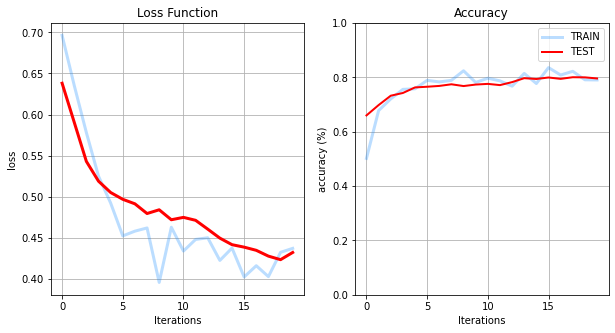

In [14]:
myModel.trainer.plotTraining()

Evaluation tracking with **Logging**, and **Trial** implemented  

In [4]:
paramSpace = space = {
    # model parameters
    'hidden_size': 486 - 50 + hp.randint('hidden_size', 50), # 486 +- 50
    'act_func_1': hp.choice('act_func_1', [nn.Tanh]),
    'act_func_2': hp.choice('act_func_2', [nn.Tanh]),
    
    # trainer parameters
    # 'optimiser': hp.choice('optimiser', [torch.optim.SGD, torch.optim.Adam, torch.optim.LBFGS]),
    'lr' : hp.uniform('lr', 0.5, 1.5),
    # 'epoch': hp.randint('epoch', 50),
    'epoch': hp.choice('epoch', [1,2,3,4]),
    # 'batch_size': hp.randint('batch_size', 512),
    'batch_size': 512 - 100 + hp.randint('batch_size', 100),
    
}

myTuner = HyperTuner(trainData, testData, myNeural)

myTuner.tunning(paramSpace = paramSpace, 
                metric='negRegAvgTestAcc', 
                algo = tpe.suggest, 
                max_evals = 500)

  0%|          | 0/500 [00:00<?, ?trial/s, best loss=?]

  0%|          | 1/500 [00:02<22:29,  2.70s/trial, best loss: -0.6824944019317627]

  0%|          | 2/500 [00:03<18:09,  2.19s/trial, best loss: -0.6824944019317627]

  1%|          | 3/500 [00:04<15:19,  1.85s/trial, best loss: -0.7160924673080444]

  1%|          | 4/500 [00:06<15:23,  1.86s/trial, best loss: -0.7160924673080444]

  1%|          | 5/500 [00:10<19:57,  2.42s/trial, best loss: -0.7160924673080444]

  1%|          | 6/500 [00:12<18:49,  2.29s/trial, best loss: -0.7160924673080444]

  1%|▏         | 7/500 [00:14<18:15,  2.22s/trial, best loss: -0.7160924673080444]

  2%|▏         | 8/500 [00:18<22:21,  2.73s/trial, best loss: -0.7160924673080444]

  2%|▏         | 9/500 [00:20<19:57,  2.44s/trial, best loss: -0.7160924673080444]

  2%|▏         | 10/500 [00:22<20:38,  2.53s/trial, best loss: -0.7160924673080444]

  2%|▏         | 11/500 [00:25<21:13,  2.60s/trial, best loss: -0.7160924673080444]

  2%|▏         | 12/500 [00:27<18:51,  2.32s/trial, best loss: -0.7160924673080444]

  3%|▎         | 13/500 [00:30<21:21,  2.63s/trial, best loss: -0.7160924673080444]

  3%|▎         | 14/500 [00:31<16:58,  2.09s/trial, best loss: -0.7160924673080444]

  3%|▎         | 15/500 [00:32<13:55,  1.72s/trial, best loss: -0.7160924673080444]

  3%|▎         | 16/500 [00:33<12:05,  1.50s/trial, best loss: -0.7160924673080444]

  3%|▎         | 17/500 [00:34<10:40,  1.33s/trial, best loss: -0.721681535243988] 

  4%|▎         | 18/500 [00:37<15:47,  1.97s/trial, best loss: -0.721681535243988]

  4%|▍         | 19/500 [00:41<19:33,  2.44s/trial, best loss: -0.721681535243988]

  4%|▍         | 20/500 [00:42<16:02,  2.01s/trial, best loss: -0.721681535243988]

  4%|▍         | 21/500 [00:43<13:26,  1.68s/trial, best loss: -0.721681535243988]

  4%|▍         | 22/500 [00:44<11:42,  1.47s/trial, best loss: -0.721681535243988]

  5%|▍         | 23/500 [00:45<10:37,  1.34s/trial, best loss: -0.721681535243988]

  5%|▍         | 24/500 [00:46<09:50,  1.24s/trial, best loss: -0.721681535243988]

  5%|▌         | 25/500 [00:47<09:00,  1.14s/trial, best loss: -0.721681535243988]

  5%|▌         | 26/500 [00:48<08:44,  1.11s/trial, best loss: -0.721681535243988]

  5%|▌         | 27/500 [00:49<08:27,  1.07s/trial, best loss: -0.721681535243988]

  6%|▌         | 28/500 [00:50<08:10,  1.04s/trial, best loss: -0.721681535243988]

  6%|▌         | 29/500 [00:52<11:53,  1.51s/trial, best loss: -0.721681535243988]

  6%|▌         | 30/500 [00:53<10:13,  1.31s/trial, best loss: -0.721681535243988]

  6%|▌         | 31/500 [00:54<09:21,  1.20s/trial, best loss: -0.721681535243988]

  6%|▋         | 32/500 [00:57<14:45,  1.89s/trial, best loss: -0.721681535243988]

  7%|▋         | 33/500 [00:58<12:39,  1.63s/trial, best loss: -0.721681535243988]

  7%|▋         | 34/500 [01:01<15:35,  2.01s/trial, best loss: -0.721681535243988]

  7%|▋         | 35/500 [01:02<12:54,  1.66s/trial, best loss: -0.721681535243988]

  7%|▋         | 36/500 [01:04<13:02,  1.69s/trial, best loss: -0.721681535243988]

  7%|▋         | 37/500 [01:08<18:10,  2.35s/trial, best loss: -0.721681535243988]

  8%|▊         | 38/500 [01:09<14:54,  1.94s/trial, best loss: -0.721681535243988]

  8%|▊         | 39/500 [01:11<14:26,  1.88s/trial, best loss: -0.721681535243988]

  8%|▊         | 40/500 [01:13<16:01,  2.09s/trial, best loss: -0.721681535243988]

  8%|▊         | 41/500 [01:14<13:04,  1.71s/trial, best loss: -0.721681535243988]

  8%|▊         | 42/500 [01:16<12:57,  1.70s/trial, best loss: -0.721681535243988]

  9%|▊         | 43/500 [01:19<16:32,  2.17s/trial, best loss: -0.721681535243988]

  9%|▉         | 44/500 [01:20<13:48,  1.82s/trial, best loss: -0.721681535243988]

  9%|▉         | 45/500 [01:22<14:53,  1.96s/trial, best loss: -0.721681535243988]

  9%|▉         | 46/500 [01:24<14:20,  1.89s/trial, best loss: -0.721681535243988]

  9%|▉         | 47/500 [01:25<12:08,  1.61s/trial, best loss: -0.721681535243988]

 10%|▉         | 48/500 [01:28<15:26,  2.05s/trial, best loss: -0.721681535243988]

 10%|▉         | 49/500 [01:29<12:57,  1.72s/trial, best loss: -0.721681535243988]

 10%|█         | 50/500 [01:32<15:06,  2.02s/trial, best loss: -0.721681535243988]

 10%|█         | 51/500 [01:33<12:48,  1.71s/trial, best loss: -0.721681535243988]

 10%|█         | 52/500 [01:35<13:11,  1.77s/trial, best loss: -0.721681535243988]

 11%|█         | 53/500 [01:36<11:29,  1.54s/trial, best loss: -0.721681535243988]

 11%|█         | 54/500 [01:39<16:07,  2.17s/trial, best loss: -0.721681535243988]

 11%|█         | 55/500 [01:40<13:26,  1.81s/trial, best loss: -0.721681535243988]

 11%|█         | 56/500 [01:41<11:23,  1.54s/trial, best loss: -0.721681535243988]

 11%|█▏        | 57/500 [01:44<14:03,  1.90s/trial, best loss: -0.721681535243988]

 12%|█▏        | 58/500 [01:45<11:46,  1.60s/trial, best loss: -0.721681535243988]

 12%|█▏        | 59/500 [01:46<12:09,  1.65s/trial, best loss: -0.721681535243988]

 12%|█▏        | 60/500 [01:47<10:40,  1.46s/trial, best loss: -0.721681535243988]

 12%|█▏        | 61/500 [01:51<16:07,  2.20s/trial, best loss: -0.721681535243988]

 12%|█▏        | 62/500 [01:52<13:18,  1.82s/trial, best loss: -0.721681535243988]

 13%|█▎        | 63/500 [01:55<15:30,  2.13s/trial, best loss: -0.721681535243988]

 13%|█▎        | 64/500 [01:56<12:55,  1.78s/trial, best loss: -0.721681535243988]

 13%|█▎        | 65/500 [01:57<11:04,  1.53s/trial, best loss: -0.721681535243988]

 13%|█▎        | 66/500 [01:59<11:44,  1.62s/trial, best loss: -0.721681535243988]

 13%|█▎        | 67/500 [02:01<13:00,  1.80s/trial, best loss: -0.721681535243988]

 14%|█▎        | 68/500 [02:03<13:00,  1.81s/trial, best loss: -0.721681535243988]

 14%|█▍        | 69/500 [02:05<13:01,  1.81s/trial, best loss: -0.721681535243988]

 14%|█▍        | 70/500 [02:07<13:13,  1.85s/trial, best loss: -0.721681535243988]

 14%|█▍        | 71/500 [02:09<13:24,  1.88s/trial, best loss: -0.721681535243988]

 14%|█▍        | 72/500 [02:11<13:33,  1.90s/trial, best loss: -0.721681535243988]

 15%|█▍        | 73/500 [02:13<13:45,  1.93s/trial, best loss: -0.721681535243988]

 15%|█▍        | 74/500 [02:14<13:33,  1.91s/trial, best loss: -0.721681535243988]

 15%|█▌        | 75/500 [02:18<16:59,  2.40s/trial, best loss: -0.721681535243988]

 15%|█▌        | 76/500 [02:19<13:47,  1.95s/trial, best loss: -0.721681535243988]

 15%|█▌        | 77/500 [02:20<11:47,  1.67s/trial, best loss: -0.721681535243988]

 16%|█▌        | 78/500 [02:23<14:32,  2.07s/trial, best loss: -0.721681535243988]

 16%|█▌        | 79/500 [02:25<13:45,  1.96s/trial, best loss: -0.721681535243988]

 16%|█▌        | 80/500 [02:26<11:34,  1.65s/trial, best loss: -0.721681535243988]

 16%|█▌        | 81/500 [02:29<14:38,  2.10s/trial, best loss: -0.721681535243988]

 16%|█▋        | 82/500 [02:30<12:07,  1.74s/trial, best loss: -0.721681535243988]

 17%|█▋        | 83/500 [02:32<12:37,  1.82s/trial, best loss: -0.721681535243988]

 17%|█▋        | 84/500 [02:32<10:32,  1.52s/trial, best loss: -0.721681535243988]

 17%|█▋        | 85/500 [02:35<12:28,  1.80s/trial, best loss: -0.721681535243988]

 17%|█▋        | 86/500 [02:36<10:35,  1.53s/trial, best loss: -0.7227621674537659]

 17%|█▋        | 87/500 [02:37<09:17,  1.35s/trial, best loss: -0.7227621674537659]

 18%|█▊        | 88/500 [02:38<08:21,  1.22s/trial, best loss: -0.7227621674537659]

 18%|█▊        | 89/500 [02:38<07:31,  1.10s/trial, best loss: -0.7227621674537659]

 18%|█▊        | 90/500 [02:39<07:09,  1.05s/trial, best loss: -0.7227621674537659]

 18%|█▊        | 91/500 [02:40<06:54,  1.01s/trial, best loss: -0.7227621674537659]

 18%|█▊        | 92/500 [02:41<06:47,  1.00trial/s, best loss: -0.7227621674537659]

 19%|█▊        | 93/500 [02:42<06:34,  1.03trial/s, best loss: -0.7227621674537659]

 19%|█▉        | 94/500 [02:43<06:23,  1.06trial/s, best loss: -0.7227621674537659]

 19%|█▉        | 95/500 [02:44<06:02,  1.12trial/s, best loss: -0.7227621674537659]

 19%|█▉        | 96/500 [02:45<06:00,  1.12trial/s, best loss: -0.7227621674537659]

 19%|█▉        | 97/500 [02:48<10:59,  1.64s/trial, best loss: -0.7227621674537659]

 20%|█▉        | 98/500 [02:49<09:20,  1.40s/trial, best loss: -0.7227621674537659]

 20%|█▉        | 99/500 [02:52<11:49,  1.77s/trial, best loss: -0.7227621674537659]

 20%|██        | 100/500 [02:53<10:05,  1.51s/trial, best loss: -0.7227621674537659]

 20%|██        | 101/500 [02:53<08:46,  1.32s/trial, best loss: -0.7227621674537659]

 20%|██        | 102/500 [02:54<07:42,  1.16s/trial, best loss: -0.7227621674537659]

 21%|██        | 103/500 [02:57<11:41,  1.77s/trial, best loss: -0.7227621674537659]

 21%|██        | 104/500 [02:58<10:16,  1.56s/trial, best loss: -0.7227621674537659]

 21%|██        | 105/500 [03:01<12:10,  1.85s/trial, best loss: -0.7227621674537659]

 21%|██        | 106/500 [03:02<10:24,  1.58s/trial, best loss: -0.7227621674537659]

 21%|██▏       | 107/500 [03:03<09:18,  1.42s/trial, best loss: -0.7227621674537659]

 22%|██▏       | 108/500 [03:06<13:22,  2.05s/trial, best loss: -0.7227621674537659]

 22%|██▏       | 109/500 [03:07<11:08,  1.71s/trial, best loss: -0.7227621674537659]

 22%|██▏       | 110/500 [03:08<09:29,  1.46s/trial, best loss: -0.7227621674537659]

 22%|██▏       | 111/500 [03:11<11:47,  1.82s/trial, best loss: -0.7227621674537659]

 22%|██▏       | 112/500 [03:12<10:07,  1.56s/trial, best loss: -0.7227621674537659]

 23%|██▎       | 113/500 [03:13<08:45,  1.36s/trial, best loss: -0.7227621674537659]

 23%|██▎       | 114/500 [03:16<12:53,  2.00s/trial, best loss: -0.7227621674537659]

 23%|██▎       | 115/500 [03:17<10:55,  1.70s/trial, best loss: -0.7227621674537659]

 23%|██▎       | 116/500 [03:18<09:14,  1.44s/trial, best loss: -0.7227621674537659]

 23%|██▎       | 117/500 [03:21<11:03,  1.73s/trial, best loss: -0.7227621674537659]

 24%|██▎       | 118/500 [03:21<09:24,  1.48s/trial, best loss: -0.7227621674537659]

 24%|██▍       | 119/500 [03:22<08:19,  1.31s/trial, best loss: -0.7227621674537659]

 24%|██▍       | 120/500 [03:26<12:17,  1.94s/trial, best loss: -0.7227621674537659]

 24%|██▍       | 121/500 [03:27<10:24,  1.65s/trial, best loss: -0.7227621674537659]

 24%|██▍       | 122/500 [03:30<12:45,  2.02s/trial, best loss: -0.7227621674537659]

 25%|██▍       | 123/500 [03:31<10:50,  1.72s/trial, best loss: -0.7227621674537659]

 25%|██▍       | 124/500 [03:32<09:31,  1.52s/trial, best loss: -0.7227621674537659]

 25%|██▌       | 125/500 [03:33<08:34,  1.37s/trial, best loss: -0.7227621674537659]

 25%|██▌       | 126/500 [03:36<12:52,  2.06s/trial, best loss: -0.7227621674537659]

 25%|██▌       | 127/500 [03:37<10:53,  1.75s/trial, best loss: -0.7227621674537659]

 26%|██▌       | 128/500 [03:38<09:18,  1.50s/trial, best loss: -0.7227621674537659]

 26%|██▌       | 129/500 [03:41<11:43,  1.90s/trial, best loss: -0.7227621674537659]

 26%|██▌       | 130/500 [03:42<10:22,  1.68s/trial, best loss: -0.7227621674537659]

 26%|██▌       | 131/500 [03:43<08:59,  1.46s/trial, best loss: -0.7227621674537659]

 26%|██▋       | 132/500 [03:48<14:04,  2.29s/trial, best loss: -0.7227621674537659]

 27%|██▋       | 133/500 [03:49<12:56,  2.12s/trial, best loss: -0.7227621674537659]

 27%|██▋       | 134/500 [03:50<10:31,  1.73s/trial, best loss: -0.7227621674537659]

 27%|██▋       | 135/500 [03:51<08:51,  1.46s/trial, best loss: -0.7227621674537659]

 27%|██▋       | 136/500 [03:54<11:11,  1.84s/trial, best loss: -0.7227621674537659]

 27%|██▋       | 137/500 [03:55<09:37,  1.59s/trial, best loss: -0.7227621674537659]

 28%|██▊       | 138/500 [03:56<08:33,  1.42s/trial, best loss: -0.7227621674537659]

 28%|██▊       | 139/500 [03:58<09:58,  1.66s/trial, best loss: -0.7227621674537659]

 28%|██▊       | 140/500 [04:02<13:45,  2.29s/trial, best loss: -0.7227621674537659]

 28%|██▊       | 141/500 [04:02<11:06,  1.86s/trial, best loss: -0.7227621674537659]

 28%|██▊       | 142/500 [04:03<09:19,  1.56s/trial, best loss: -0.7227621674537659]

 29%|██▊       | 143/500 [04:06<11:38,  1.96s/trial, best loss: -0.7227621674537659]

 29%|██▉       | 144/500 [04:07<09:45,  1.64s/trial, best loss: -0.7227621674537659]

 29%|██▉       | 145/500 [04:09<10:22,  1.75s/trial, best loss: -0.7227621674537659]

 29%|██▉       | 146/500 [04:10<09:05,  1.54s/trial, best loss: -0.7227621674537659]

 29%|██▉       | 147/500 [04:11<08:01,  1.37s/trial, best loss: -0.7227621674537659]

 30%|██▉       | 148/500 [04:12<07:24,  1.26s/trial, best loss: -0.7227621674537659]

 30%|██▉       | 149/500 [04:13<06:57,  1.19s/trial, best loss: -0.7227621674537659]

 30%|███       | 150/500 [04:14<06:38,  1.14s/trial, best loss: -0.7227621674537659]

 30%|███       | 151/500 [04:15<06:18,  1.08s/trial, best loss: -0.7227621674537659]

 30%|███       | 152/500 [04:16<06:07,  1.05s/trial, best loss: -0.7227621674537659]

 31%|███       | 153/500 [04:17<06:04,  1.05s/trial, best loss: -0.7227621674537659]

 31%|███       | 154/500 [04:18<06:13,  1.08s/trial, best loss: -0.7227621674537659]

 31%|███       | 155/500 [04:19<06:09,  1.07s/trial, best loss: -0.7308292388916016]

 31%|███       | 156/500 [04:20<05:58,  1.04s/trial, best loss: -0.7308292388916016]

 31%|███▏      | 157/500 [04:21<05:49,  1.02s/trial, best loss: -0.7308292388916016]

 32%|███▏      | 158/500 [04:22<05:47,  1.02s/trial, best loss: -0.7308292388916016]

 32%|███▏      | 159/500 [04:23<05:57,  1.05s/trial, best loss: -0.7308292388916016]

 32%|███▏      | 160/500 [04:24<05:44,  1.01s/trial, best loss: -0.7308292388916016]

 32%|███▏      | 161/500 [04:28<10:26,  1.85s/trial, best loss: -0.7308292388916016]

 32%|███▏      | 162/500 [04:29<09:04,  1.61s/trial, best loss: -0.7308292388916016]

 33%|███▎      | 163/500 [04:32<11:21,  2.02s/trial, best loss: -0.7308292388916016]

 33%|███▎      | 164/500 [04:33<09:28,  1.69s/trial, best loss: -0.7308292388916016]

 33%|███▎      | 165/500 [04:34<08:17,  1.48s/trial, best loss: -0.7308292388916016]

 33%|███▎      | 166/500 [04:36<08:55,  1.60s/trial, best loss: -0.7308292388916016]

 33%|███▎      | 167/500 [04:37<07:45,  1.40s/trial, best loss: -0.7308292388916016]

 34%|███▎      | 168/500 [04:42<14:31,  2.62s/trial, best loss: -0.7308292388916016]

 34%|███▍      | 169/500 [04:43<11:50,  2.15s/trial, best loss: -0.7308292388916016]

 34%|███▍      | 170/500 [04:45<10:15,  1.86s/trial, best loss: -0.7308292388916016]

 34%|███▍      | 171/500 [04:48<11:51,  2.16s/trial, best loss: -0.7308292388916016]

 34%|███▍      | 172/500 [04:48<09:49,  1.80s/trial, best loss: -0.7308292388916016]

 35%|███▍      | 173/500 [04:50<09:54,  1.82s/trial, best loss: -0.7308292388916016]

 35%|███▍      | 174/500 [04:51<08:23,  1.54s/trial, best loss: -0.7308292388916016]

 35%|███▌      | 175/500 [04:52<07:24,  1.37s/trial, best loss: -0.7308292388916016]

 35%|███▌      | 176/500 [04:56<10:52,  2.01s/trial, best loss: -0.7308292388916016]

 35%|███▌      | 177/500 [04:57<09:58,  1.85s/trial, best loss: -0.7308292388916016]

 36%|███▌      | 178/500 [05:01<13:44,  2.56s/trial, best loss: -0.7308292388916016]

 36%|███▌      | 179/500 [05:02<11:04,  2.07s/trial, best loss: -0.7308292388916016]

 36%|███▌      | 180/500 [05:03<09:09,  1.72s/trial, best loss: -0.7308292388916016]

 36%|███▌      | 181/500 [05:05<09:21,  1.76s/trial, best loss: -0.7308292388916016]

 36%|███▋      | 182/500 [05:06<08:01,  1.52s/trial, best loss: -0.7308292388916016]

 37%|███▋      | 183/500 [05:10<11:23,  2.16s/trial, best loss: -0.7308292388916016]

 37%|███▋      | 184/500 [05:11<09:20,  1.77s/trial, best loss: -0.7308292388916016]

 37%|███▋      | 185/500 [05:11<07:55,  1.51s/trial, best loss: -0.7308292388916016]

 37%|███▋      | 186/500 [05:14<09:50,  1.88s/trial, best loss: -0.7308292388916016]

 37%|███▋      | 187/500 [05:15<08:20,  1.60s/trial, best loss: -0.7308292388916016]

 38%|███▊      | 188/500 [05:16<07:11,  1.38s/trial, best loss: -0.7308292388916016]

 38%|███▊      | 189/500 [05:18<08:27,  1.63s/trial, best loss: -0.7308292388916016]

 38%|███▊      | 190/500 [05:19<07:22,  1.43s/trial, best loss: -0.7308292388916016]

 38%|███▊      | 191/500 [05:20<06:34,  1.28s/trial, best loss: -0.7308292388916016]

 38%|███▊      | 192/500 [05:23<09:47,  1.91s/trial, best loss: -0.7308292388916016]

 39%|███▊      | 193/500 [05:24<08:22,  1.64s/trial, best loss: -0.7308292388916016]

 39%|███▉      | 194/500 [05:25<07:22,  1.45s/trial, best loss: -0.7308292388916016]

 39%|███▉      | 195/500 [05:28<09:14,  1.82s/trial, best loss: -0.7308292388916016]

 39%|███▉      | 196/500 [05:29<07:57,  1.57s/trial, best loss: -0.7308292388916016]

 39%|███▉      | 197/500 [05:31<08:15,  1.63s/trial, best loss: -0.7308292388916016]

 40%|███▉      | 198/500 [05:32<07:07,  1.41s/trial, best loss: -0.7308292388916016]

 40%|███▉      | 199/500 [05:33<06:16,  1.25s/trial, best loss: -0.7308292388916016]

 40%|████      | 200/500 [05:36<09:47,  1.96s/trial, best loss: -0.7308292388916016]

 40%|████      | 201/500 [05:37<08:14,  1.65s/trial, best loss: -0.7308292388916016]

 40%|████      | 202/500 [05:38<07:07,  1.44s/trial, best loss: -0.7308292388916016]

 41%|████      | 203/500 [05:41<09:22,  1.89s/trial, best loss: -0.7308292388916016]

 41%|████      | 204/500 [05:42<08:08,  1.65s/trial, best loss: -0.7308292388916016]

 41%|████      | 205/500 [05:44<08:39,  1.76s/trial, best loss: -0.7308292388916016]

 41%|████      | 206/500 [05:45<07:46,  1.59s/trial, best loss: -0.7308292388916016]

 41%|████▏     | 207/500 [05:47<06:59,  1.43s/trial, best loss: -0.7308292388916016]

 42%|████▏     | 208/500 [05:51<11:11,  2.30s/trial, best loss: -0.7308292388916016]

 42%|████▏     | 209/500 [05:52<09:36,  1.98s/trial, best loss: -0.7308292388916016]

 42%|████▏     | 210/500 [05:53<08:06,  1.68s/trial, best loss: -0.7308292388916016]

 42%|████▏     | 211/500 [05:54<07:03,  1.47s/trial, best loss: -0.7308292388916016]

 42%|████▏     | 212/500 [05:57<09:10,  1.91s/trial, best loss: -0.7308292388916016]

 43%|████▎     | 213/500 [05:59<09:23,  1.97s/trial, best loss: -0.7308292388916016]

 43%|████▎     | 214/500 [06:00<07:54,  1.66s/trial, best loss: -0.7308292388916016]

 43%|████▎     | 215/500 [06:01<06:51,  1.44s/trial, best loss: -0.7308292388916016]

 43%|████▎     | 216/500 [06:05<10:04,  2.13s/trial, best loss: -0.7308292388916016]

 43%|████▎     | 217/500 [06:06<08:30,  1.80s/trial, best loss: -0.7308292388916016]

 44%|████▎     | 218/500 [06:07<07:20,  1.56s/trial, best loss: -0.7308292388916016]

 44%|████▍     | 219/500 [06:09<09:00,  1.92s/trial, best loss: -0.7308292388916016]

 44%|████▍     | 220/500 [06:11<07:43,  1.66s/trial, best loss: -0.7308292388916016]

 44%|████▍     | 221/500 [06:12<08:05,  1.74s/trial, best loss: -0.7308292388916016]

 44%|████▍     | 222/500 [06:13<06:56,  1.50s/trial, best loss: -0.7308292388916016]

 45%|████▍     | 223/500 [06:14<05:58,  1.30s/trial, best loss: -0.7308292388916016]

 45%|████▍     | 224/500 [06:15<05:19,  1.16s/trial, best loss: -0.7308292388916016]

 45%|████▌     | 225/500 [06:19<09:22,  2.04s/trial, best loss: -0.7308292388916016]

 45%|████▌     | 226/500 [06:20<07:45,  1.70s/trial, best loss: -0.7308292388916016]

 45%|████▌     | 227/500 [06:21<06:57,  1.53s/trial, best loss: -0.7308292388916016]

 46%|████▌     | 228/500 [06:24<09:00,  1.99s/trial, best loss: -0.7308292388916016]

 46%|████▌     | 229/500 [06:25<07:31,  1.67s/trial, best loss: -0.7357799410820007]

 46%|████▌     | 230/500 [06:26<06:38,  1.47s/trial, best loss: -0.7357799410820007]

 46%|████▌     | 231/500 [06:28<07:04,  1.58s/trial, best loss: -0.7357799410820007]

 46%|████▋     | 232/500 [06:29<06:07,  1.37s/trial, best loss: -0.7357799410820007]

 47%|████▋     | 233/500 [06:32<08:51,  1.99s/trial, best loss: -0.7357799410820007]

 47%|████▋     | 234/500 [06:33<07:18,  1.65s/trial, best loss: -0.7357799410820007]

 47%|████▋     | 235/500 [06:34<06:17,  1.43s/trial, best loss: -0.7357799410820007]

 47%|████▋     | 236/500 [06:37<08:14,  1.87s/trial, best loss: -0.7357799410820007]

 47%|████▋     | 237/500 [06:38<06:53,  1.57s/trial, best loss: -0.7357799410820007]

 48%|████▊     | 238/500 [06:39<06:04,  1.39s/trial, best loss: -0.7357799410820007]

 48%|████▊     | 239/500 [06:41<06:50,  1.57s/trial, best loss: -0.7357799410820007]

 48%|████▊     | 240/500 [06:42<05:52,  1.36s/trial, best loss: -0.7357799410820007]

 48%|████▊     | 241/500 [06:45<08:59,  2.08s/trial, best loss: -0.7357799410820007]

 48%|████▊     | 242/500 [06:46<07:26,  1.73s/trial, best loss: -0.7357799410820007]

 49%|████▊     | 243/500 [06:47<06:25,  1.50s/trial, best loss: -0.7357799410820007]

 49%|████▉     | 244/500 [06:50<07:43,  1.81s/trial, best loss: -0.7357799410820007]

 49%|████▉     | 245/500 [06:51<06:30,  1.53s/trial, best loss: -0.7357799410820007]

 49%|████▉     | 246/500 [06:52<05:40,  1.34s/trial, best loss: -0.7357799410820007]

 49%|████▉     | 247/500 [06:53<06:13,  1.48s/trial, best loss: -0.7357799410820007]

 50%|████▉     | 248/500 [06:54<05:23,  1.28s/trial, best loss: -0.7357799410820007]

 50%|████▉     | 249/500 [06:58<08:45,  2.09s/trial, best loss: -0.7357799410820007]

 50%|█████     | 250/500 [06:59<07:20,  1.76s/trial, best loss: -0.7357799410820007]

 50%|█████     | 251/500 [07:00<06:27,  1.56s/trial, best loss: -0.7357799410820007]

 50%|█████     | 252/500 [07:01<05:30,  1.33s/trial, best loss: -0.7357799410820007]

 51%|█████     | 253/500 [07:04<07:06,  1.73s/trial, best loss: -0.7357799410820007]

 51%|█████     | 254/500 [07:05<06:07,  1.50s/trial, best loss: -0.7357799410820007]

 51%|█████     | 255/500 [07:06<06:26,  1.58s/trial, best loss: -0.7357799410820007]

 51%|█████     | 256/500 [07:07<05:31,  1.36s/trial, best loss: -0.7357799410820007]

 51%|█████▏    | 257/500 [07:08<04:56,  1.22s/trial, best loss: -0.7357799410820007]

 52%|█████▏    | 258/500 [07:09<04:28,  1.11s/trial, best loss: -0.7357799410820007]

 52%|█████▏    | 259/500 [07:10<04:19,  1.08s/trial, best loss: -0.7357799410820007]

 52%|█████▏    | 260/500 [07:11<04:05,  1.02s/trial, best loss: -0.7357799410820007]

 52%|█████▏    | 261/500 [07:12<03:53,  1.02trial/s, best loss: -0.7357799410820007]

 52%|█████▏    | 262/500 [07:13<03:49,  1.04trial/s, best loss: -0.7357799410820007]

 53%|█████▎    | 263/500 [07:14<03:48,  1.04trial/s, best loss: -0.7357799410820007]

 53%|█████▎    | 264/500 [07:15<03:49,  1.03trial/s, best loss: -0.7357799410820007]

 53%|█████▎    | 265/500 [07:16<03:48,  1.03trial/s, best loss: -0.7357799410820007]

 53%|█████▎    | 266/500 [07:17<03:44,  1.04trial/s, best loss: -0.7357799410820007]

 53%|█████▎    | 267/500 [07:18<03:44,  1.04trial/s, best loss: -0.7357799410820007]

 54%|█████▎    | 268/500 [07:19<03:42,  1.04trial/s, best loss: -0.7357799410820007]

 54%|█████▍    | 269/500 [07:19<03:34,  1.08trial/s, best loss: -0.7357799410820007]

 54%|█████▍    | 270/500 [07:20<03:36,  1.06trial/s, best loss: -0.7357799410820007]

 54%|█████▍    | 271/500 [07:21<03:32,  1.08trial/s, best loss: -0.7357799410820007]

 54%|█████▍    | 272/500 [07:22<03:25,  1.11trial/s, best loss: -0.7357799410820007]

 55%|█████▍    | 273/500 [07:23<03:29,  1.09trial/s, best loss: -0.7357799410820007]

 55%|█████▍    | 274/500 [07:24<03:27,  1.09trial/s, best loss: -0.7357799410820007]

 55%|█████▌    | 275/500 [07:28<06:44,  1.80s/trial, best loss: -0.7357799410820007]

 55%|█████▌    | 276/500 [07:29<05:54,  1.58s/trial, best loss: -0.7357799410820007]

 55%|█████▌    | 277/500 [07:30<05:02,  1.35s/trial, best loss: -0.7357799410820007]

 56%|█████▌    | 278/500 [07:33<06:41,  1.81s/trial, best loss: -0.7357799410820007]

 56%|█████▌    | 279/500 [07:34<05:41,  1.54s/trial, best loss: -0.7357799410820007]

 56%|█████▌    | 280/500 [07:35<05:00,  1.37s/trial, best loss: -0.7357799410820007]

 56%|█████▌    | 281/500 [07:36<05:10,  1.42s/trial, best loss: -0.7357799410820007]

 56%|█████▋    | 282/500 [07:37<04:39,  1.28s/trial, best loss: -0.7357799410820007]

 57%|█████▋    | 283/500 [07:38<04:15,  1.18s/trial, best loss: -0.7357799410820007]

 57%|█████▋    | 284/500 [07:41<06:42,  1.86s/trial, best loss: -0.7357799410820007]

 57%|█████▋    | 285/500 [07:42<05:35,  1.56s/trial, best loss: -0.7357799410820007]

 57%|█████▋    | 286/500 [07:43<04:48,  1.35s/trial, best loss: -0.7357799410820007]

 57%|█████▋    | 287/500 [07:46<06:32,  1.84s/trial, best loss: -0.7357799410820007]

 58%|█████▊    | 288/500 [07:47<05:31,  1.56s/trial, best loss: -0.7357799410820007]

 58%|█████▊    | 289/500 [07:48<04:54,  1.40s/trial, best loss: -0.7357799410820007]

 58%|█████▊    | 290/500 [07:50<05:14,  1.50s/trial, best loss: -0.7357799410820007]

 58%|█████▊    | 291/500 [07:51<04:38,  1.33s/trial, best loss: -0.7357799410820007]

 58%|█████▊    | 292/500 [07:52<04:11,  1.21s/trial, best loss: -0.7357799410820007]

 59%|█████▊    | 293/500 [07:55<06:39,  1.93s/trial, best loss: -0.7357799410820007]

 59%|█████▉    | 294/500 [07:56<05:46,  1.68s/trial, best loss: -0.7357799410820007]

 59%|█████▉    | 295/500 [07:57<04:58,  1.46s/trial, best loss: -0.7357799410820007]

 59%|█████▉    | 296/500 [08:00<06:05,  1.79s/trial, best loss: -0.7357799410820007]

 59%|█████▉    | 297/500 [08:01<05:08,  1.52s/trial, best loss: -0.7357799410820007]

 60%|█████▉    | 298/500 [08:03<05:25,  1.61s/trial, best loss: -0.7357799410820007]

 60%|█████▉    | 299/500 [08:03<04:39,  1.39s/trial, best loss: -0.7357799410820007]

 60%|██████    | 300/500 [08:04<04:14,  1.27s/trial, best loss: -0.7357799410820007]

 60%|██████    | 301/500 [08:05<03:54,  1.18s/trial, best loss: -0.7357799410820007]

 60%|██████    | 302/500 [08:06<03:34,  1.08s/trial, best loss: -0.7357799410820007]

 61%|██████    | 303/500 [08:10<06:25,  1.96s/trial, best loss: -0.7357799410820007]

 61%|██████    | 304/500 [08:11<05:23,  1.65s/trial, best loss: -0.7357799410820007]

 61%|██████    | 305/500 [08:14<06:15,  1.92s/trial, best loss: -0.7357799410820007]

 61%|██████    | 306/500 [08:15<05:09,  1.59s/trial, best loss: -0.7357799410820007]

 61%|██████▏   | 307/500 [08:15<04:27,  1.39s/trial, best loss: -0.7357799410820007]

 62%|██████▏   | 308/500 [08:18<05:05,  1.59s/trial, best loss: -0.7357799410820007]

 62%|██████▏   | 309/500 [08:19<04:30,  1.42s/trial, best loss: -0.7357799410820007]

 62%|██████▏   | 310/500 [08:20<04:02,  1.28s/trial, best loss: -0.7357799410820007]

 62%|██████▏   | 311/500 [08:23<06:08,  1.95s/trial, best loss: -0.7357799410820007]

 62%|██████▏   | 312/500 [08:24<05:16,  1.68s/trial, best loss: -0.7357799410820007]

 63%|██████▎   | 313/500 [08:25<04:32,  1.45s/trial, best loss: -0.7357799410820007]

 63%|██████▎   | 314/500 [08:28<05:36,  1.81s/trial, best loss: -0.7357799410820007]

 63%|██████▎   | 315/500 [08:29<04:57,  1.61s/trial, best loss: -0.7357799410820007]

 63%|██████▎   | 316/500 [08:30<04:14,  1.38s/trial, best loss: -0.7357799410820007]

 63%|██████▎   | 317/500 [08:31<04:32,  1.49s/trial, best loss: -0.7357799410820007]

 64%|██████▎   | 318/500 [08:32<03:58,  1.31s/trial, best loss: -0.7357799410820007]

 64%|██████▍   | 319/500 [08:33<03:32,  1.18s/trial, best loss: -0.7357799410820007]

 64%|██████▍   | 320/500 [08:37<05:30,  1.83s/trial, best loss: -0.7357799410820007]

 64%|██████▍   | 321/500 [08:38<04:46,  1.60s/trial, best loss: -0.7357799410820007]

 64%|██████▍   | 322/500 [08:39<04:17,  1.45s/trial, best loss: -0.7357799410820007]

 65%|██████▍   | 323/500 [08:41<05:29,  1.86s/trial, best loss: -0.7357799410820007]

 65%|██████▍   | 324/500 [08:42<04:42,  1.60s/trial, best loss: -0.7357799410820007]

 65%|██████▌   | 325/500 [08:43<04:05,  1.40s/trial, best loss: -0.7357799410820007]

 65%|██████▌   | 326/500 [08:45<04:39,  1.61s/trial, best loss: -0.7357799410820007]

 65%|██████▌   | 327/500 [08:47<04:08,  1.44s/trial, best loss: -0.7357799410820007]

 66%|██████▌   | 328/500 [08:47<03:39,  1.28s/trial, best loss: -0.7357799410820007]

 66%|██████▌   | 329/500 [08:51<05:50,  2.05s/trial, best loss: -0.7357799410820007]

 66%|██████▌   | 330/500 [08:52<04:59,  1.76s/trial, best loss: -0.7357799410820007]

 66%|██████▌   | 331/500 [08:53<04:19,  1.54s/trial, best loss: -0.7357799410820007]

 66%|██████▋   | 332/500 [08:56<05:03,  1.81s/trial, best loss: -0.7357799410820007]

 67%|██████▋   | 333/500 [08:57<04:15,  1.53s/trial, best loss: -0.7357799410820007]

 67%|██████▋   | 334/500 [08:58<03:53,  1.41s/trial, best loss: -0.7357799410820007]

 67%|██████▋   | 335/500 [09:00<04:30,  1.64s/trial, best loss: -0.7357799410820007]

 67%|██████▋   | 336/500 [09:01<03:53,  1.42s/trial, best loss: -0.7357799410820007]

 67%|██████▋   | 337/500 [09:02<03:25,  1.26s/trial, best loss: -0.7357799410820007]

 68%|██████▊   | 338/500 [09:06<05:45,  2.13s/trial, best loss: -0.7357799410820007]

 68%|██████▊   | 339/500 [09:07<04:53,  1.82s/trial, best loss: -0.7357799410820007]

 68%|██████▊   | 340/500 [09:08<04:14,  1.59s/trial, best loss: -0.7357799410820007]

 68%|██████▊   | 341/500 [09:11<05:16,  1.99s/trial, best loss: -0.7357799410820007]

 68%|██████▊   | 342/500 [09:12<04:23,  1.67s/trial, best loss: -0.7357799410820007]

 69%|██████▊   | 343/500 [09:13<03:44,  1.43s/trial, best loss: -0.7357799410820007]

 69%|██████▉   | 344/500 [09:15<04:15,  1.64s/trial, best loss: -0.7357799410820007]

 69%|██████▉   | 345/500 [09:16<03:44,  1.45s/trial, best loss: -0.7357799410820007]

 69%|██████▉   | 346/500 [09:17<03:29,  1.36s/trial, best loss: -0.7357799410820007]

 69%|██████▉   | 347/500 [09:21<05:30,  2.16s/trial, best loss: -0.7357799410820007]

 70%|██████▉   | 348/500 [09:22<04:38,  1.83s/trial, best loss: -0.7357799410820007]

 70%|██████▉   | 349/500 [09:23<03:58,  1.58s/trial, best loss: -0.7357799410820007]

 70%|███████   | 350/500 [09:26<05:05,  2.04s/trial, best loss: -0.7357799410820007]

 70%|███████   | 351/500 [09:28<04:26,  1.79s/trial, best loss: -0.7357799410820007]

 70%|███████   | 352/500 [09:28<03:47,  1.53s/trial, best loss: -0.7357799410820007]

 71%|███████   | 353/500 [09:29<03:17,  1.34s/trial, best loss: -0.7357799410820007]

 71%|███████   | 354/500 [09:31<03:38,  1.50s/trial, best loss: -0.7357799410820007]

 71%|███████   | 355/500 [09:32<03:12,  1.33s/trial, best loss: -0.7357799410820007]

 71%|███████   | 356/500 [09:33<02:52,  1.20s/trial, best loss: -0.7357799410820007]

 71%|███████▏  | 357/500 [09:37<04:32,  1.91s/trial, best loss: -0.7357799410820007]

 72%|███████▏  | 358/500 [09:38<03:52,  1.64s/trial, best loss: -0.7357799410820007]

 72%|███████▏  | 359/500 [09:40<04:38,  1.97s/trial, best loss: -0.7357799410820007]

 72%|███████▏  | 360/500 [09:41<03:52,  1.66s/trial, best loss: -0.7357799410820007]

 72%|███████▏  | 361/500 [09:42<03:20,  1.44s/trial, best loss: -0.7357799410820007]

 72%|███████▏  | 362/500 [09:44<03:38,  1.58s/trial, best loss: -0.7357799410820007]

 73%|███████▎  | 363/500 [09:45<03:07,  1.37s/trial, best loss: -0.7357799410820007]

 73%|███████▎  | 364/500 [09:46<02:45,  1.22s/trial, best loss: -0.7357799410820007]

 73%|███████▎  | 365/500 [09:49<04:19,  1.92s/trial, best loss: -0.7357799410820007]

 73%|███████▎  | 366/500 [09:50<03:37,  1.62s/trial, best loss: -0.7357799410820007]

 73%|███████▎  | 367/500 [09:51<03:05,  1.40s/trial, best loss: -0.7357799410820007]

 74%|███████▎  | 368/500 [09:54<04:03,  1.85s/trial, best loss: -0.7357799410820007]

 74%|███████▍  | 369/500 [09:55<03:30,  1.61s/trial, best loss: -0.7357799410820007]

 74%|███████▍  | 370/500 [09:56<03:03,  1.41s/trial, best loss: -0.7357799410820007]

 74%|███████▍  | 371/500 [09:58<03:18,  1.54s/trial, best loss: -0.7357799410820007]

 74%|███████▍  | 372/500 [09:59<02:54,  1.37s/trial, best loss: -0.7357799410820007]

 75%|███████▍  | 373/500 [10:00<02:36,  1.23s/trial, best loss: -0.7357799410820007]

 75%|███████▍  | 374/500 [10:03<03:50,  1.83s/trial, best loss: -0.7357799410820007]

 75%|███████▌  | 375/500 [10:04<03:21,  1.61s/trial, best loss: -0.7357799410820007]

 75%|███████▌  | 376/500 [10:05<02:55,  1.41s/trial, best loss: -0.7357799410820007]

 75%|███████▌  | 377/500 [10:08<03:40,  1.79s/trial, best loss: -0.7357799410820007]

 76%|███████▌  | 378/500 [10:09<03:09,  1.55s/trial, best loss: -0.7357799410820007]

 76%|███████▌  | 379/500 [10:10<02:46,  1.37s/trial, best loss: -0.7357799410820007]

 76%|███████▌  | 380/500 [10:12<03:24,  1.71s/trial, best loss: -0.7357799410820007]

 76%|███████▌  | 381/500 [10:14<03:07,  1.57s/trial, best loss: -0.7357799410820007]

 76%|███████▋  | 382/500 [10:15<02:50,  1.44s/trial, best loss: -0.7357799410820007]

 77%|███████▋  | 383/500 [10:19<04:24,  2.26s/trial, best loss: -0.7357799410820007]

 77%|███████▋  | 384/500 [10:20<03:32,  1.83s/trial, best loss: -0.7357799410820007]

 77%|███████▋  | 385/500 [10:21<03:06,  1.62s/trial, best loss: -0.7357799410820007]

 77%|███████▋  | 386/500 [10:24<04:04,  2.14s/trial, best loss: -0.7357799410820007]

 77%|███████▋  | 387/500 [10:25<03:22,  1.79s/trial, best loss: -0.7357799410820007]

 78%|███████▊  | 388/500 [10:26<02:53,  1.55s/trial, best loss: -0.7357799410820007]

 78%|███████▊  | 389/500 [10:28<02:56,  1.59s/trial, best loss: -0.7357799410820007]

 78%|███████▊  | 390/500 [10:29<02:40,  1.46s/trial, best loss: -0.7357799410820007]

 78%|███████▊  | 391/500 [10:30<02:20,  1.29s/trial, best loss: -0.7357799410820007]

 78%|███████▊  | 392/500 [10:33<03:29,  1.94s/trial, best loss: -0.7357799410820007]

 79%|███████▊  | 393/500 [10:34<02:58,  1.67s/trial, best loss: -0.7357799410820007]

 79%|███████▉  | 394/500 [10:35<02:35,  1.47s/trial, best loss: -0.7357799410820007]

 79%|███████▉  | 395/500 [10:36<02:15,  1.29s/trial, best loss: -0.7357799410820007]

 79%|███████▉  | 396/500 [10:39<02:58,  1.72s/trial, best loss: -0.7357799410820007]

 79%|███████▉  | 397/500 [10:40<02:36,  1.52s/trial, best loss: -0.7357799410820007]

 80%|███████▉  | 398/500 [10:42<02:47,  1.64s/trial, best loss: -0.7357799410820007]

 80%|███████▉  | 399/500 [10:43<02:25,  1.44s/trial, best loss: -0.7357799410820007]

 80%|████████  | 400/500 [10:44<02:14,  1.34s/trial, best loss: -0.7357799410820007]

 80%|████████  | 401/500 [10:45<02:04,  1.25s/trial, best loss: -0.7357799410820007]

 80%|████████  | 402/500 [10:46<02:04,  1.27s/trial, best loss: -0.7357799410820007]

 81%|████████  | 403/500 [10:47<01:53,  1.17s/trial, best loss: -0.7357799410820007]

 81%|████████  | 404/500 [10:48<01:43,  1.08s/trial, best loss: -0.7357799410820007]

 81%|████████  | 405/500 [10:49<01:37,  1.02s/trial, best loss: -0.7357799410820007]

 81%|████████  | 406/500 [10:50<01:37,  1.04s/trial, best loss: -0.7357799410820007]

 81%|████████▏ | 407/500 [10:51<01:35,  1.03s/trial, best loss: -0.7357799410820007]

 82%|████████▏ | 408/500 [10:52<01:31,  1.00trial/s, best loss: -0.7357799410820007]

 82%|████████▏ | 409/500 [10:53<01:28,  1.03trial/s, best loss: -0.7357799410820007]

 82%|████████▏ | 410/500 [10:54<01:26,  1.04trial/s, best loss: -0.7357799410820007]

 82%|████████▏ | 411/500 [10:55<01:23,  1.06trial/s, best loss: -0.7357799410820007]

 82%|████████▏ | 412/500 [10:56<01:20,  1.10trial/s, best loss: -0.7357799410820007]

 83%|████████▎ | 413/500 [10:56<01:16,  1.13trial/s, best loss: -0.7357799410820007]

 83%|████████▎ | 414/500 [10:57<01:16,  1.13trial/s, best loss: -0.7357799410820007]

 83%|████████▎ | 415/500 [10:59<01:22,  1.03trial/s, best loss: -0.7357799410820007]

 83%|████████▎ | 416/500 [11:00<01:27,  1.04s/trial, best loss: -0.7357799410820007]

 83%|████████▎ | 417/500 [11:01<01:24,  1.02s/trial, best loss: -0.7357799410820007]

 84%|████████▎ | 418/500 [11:02<01:23,  1.02s/trial, best loss: -0.7357799410820007]

 84%|████████▍ | 419/500 [11:03<01:19,  1.02trial/s, best loss: -0.7357799410820007]

 84%|████████▍ | 420/500 [11:03<01:15,  1.05trial/s, best loss: -0.7357799410820007]

 84%|████████▍ | 421/500 [11:04<01:14,  1.06trial/s, best loss: -0.7357799410820007]

 84%|████████▍ | 422/500 [11:05<01:12,  1.07trial/s, best loss: -0.7357799410820007]

 85%|████████▍ | 423/500 [11:06<01:12,  1.06trial/s, best loss: -0.7357799410820007]

 85%|████████▍ | 424/500 [11:07<01:10,  1.08trial/s, best loss: -0.7357799410820007]

 85%|████████▌ | 425/500 [11:11<02:10,  1.74s/trial, best loss: -0.7357799410820007]

 85%|████████▌ | 426/500 [11:12<01:50,  1.50s/trial, best loss: -0.7357799410820007]

 85%|████████▌ | 427/500 [11:13<01:38,  1.35s/trial, best loss: -0.7357799410820007]

 86%|████████▌ | 428/500 [11:16<02:08,  1.79s/trial, best loss: -0.7357799410820007]

 86%|████████▌ | 429/500 [11:17<01:49,  1.55s/trial, best loss: -0.7357799410820007]

 86%|████████▌ | 430/500 [11:18<01:38,  1.40s/trial, best loss: -0.7357799410820007]

 86%|████████▌ | 431/500 [11:19<01:46,  1.54s/trial, best loss: -0.7357799410820007]

 86%|████████▋ | 432/500 [11:21<01:34,  1.39s/trial, best loss: -0.7357799410820007]

 87%|████████▋ | 433/500 [11:21<01:24,  1.26s/trial, best loss: -0.7357799410820007]

 87%|████████▋ | 434/500 [11:22<01:16,  1.17s/trial, best loss: -0.7357799410820007]

 87%|████████▋ | 435/500 [11:26<02:08,  1.98s/trial, best loss: -0.7357799410820007]

 87%|████████▋ | 436/500 [11:27<01:51,  1.74s/trial, best loss: -0.7357799410820007]

 87%|████████▋ | 437/500 [11:28<01:35,  1.52s/trial, best loss: -0.7357799410820007]

 88%|████████▊ | 438/500 [11:32<02:05,  2.02s/trial, best loss: -0.7357799410820007]

 88%|████████▊ | 439/500 [11:33<01:45,  1.74s/trial, best loss: -0.7357799410820007]

 88%|████████▊ | 440/500 [11:34<01:31,  1.52s/trial, best loss: -0.7357799410820007]

 88%|████████▊ | 441/500 [11:36<01:40,  1.71s/trial, best loss: -0.7357799410820007]

 88%|████████▊ | 442/500 [11:37<01:31,  1.57s/trial, best loss: -0.7357799410820007]

 89%|████████▊ | 443/500 [11:38<01:21,  1.42s/trial, best loss: -0.7357799410820007]

 89%|████████▉ | 444/500 [11:39<01:15,  1.35s/trial, best loss: -0.7357799410820007]

 89%|████████▉ | 445/500 [11:44<02:00,  2.18s/trial, best loss: -0.7357799410820007]

 89%|████████▉ | 446/500 [11:44<01:36,  1.79s/trial, best loss: -0.7357799410820007]

 89%|████████▉ | 447/500 [11:45<01:22,  1.56s/trial, best loss: -0.7357799410820007]

 90%|████████▉ | 448/500 [11:46<01:11,  1.38s/trial, best loss: -0.7357799410820007]

 90%|████████▉ | 449/500 [11:49<01:36,  1.89s/trial, best loss: -0.7357799410820007]

 90%|█████████ | 450/500 [11:50<01:19,  1.60s/trial, best loss: -0.7357799410820007]

 90%|█████████ | 451/500 [11:52<01:21,  1.66s/trial, best loss: -0.7357799410820007]

 90%|█████████ | 452/500 [11:53<01:10,  1.46s/trial, best loss: -0.7357799410820007]

 91%|█████████ | 453/500 [11:54<01:02,  1.32s/trial, best loss: -0.7357799410820007]

 91%|█████████ | 454/500 [11:55<00:54,  1.18s/trial, best loss: -0.7357799410820007]

 91%|█████████ | 455/500 [11:59<01:29,  1.99s/trial, best loss: -0.7357799410820007]

 91%|█████████ | 456/500 [12:00<01:12,  1.65s/trial, best loss: -0.7357799410820007]

 91%|█████████▏| 457/500 [12:01<01:02,  1.44s/trial, best loss: -0.7357799410820007]

 92%|█████████▏| 458/500 [12:04<01:17,  1.85s/trial, best loss: -0.7357799410820007]

 92%|█████████▏| 459/500 [12:04<01:04,  1.58s/trial, best loss: -0.7357799410820007]

 92%|█████████▏| 460/500 [12:06<00:56,  1.41s/trial, best loss: -0.7357799410820007]

 92%|█████████▏| 461/500 [12:07<01:00,  1.56s/trial, best loss: -0.7357799410820007]

 92%|█████████▏| 462/500 [12:08<00:51,  1.36s/trial, best loss: -0.7357799410820007]

 93%|█████████▎| 463/500 [12:09<00:46,  1.25s/trial, best loss: -0.7357799410820007]

 93%|█████████▎| 464/500 [12:10<00:43,  1.20s/trial, best loss: -0.7357799410820007]

 93%|█████████▎| 465/500 [12:11<00:39,  1.13s/trial, best loss: -0.7357799410820007]

 93%|█████████▎| 466/500 [12:15<01:03,  1.86s/trial, best loss: -0.7357799410820007]

 93%|█████████▎| 467/500 [12:16<00:51,  1.58s/trial, best loss: -0.7357799410820007]

 94%|█████████▎| 468/500 [12:19<01:02,  1.96s/trial, best loss: -0.7357799410820007]

 94%|█████████▍| 469/500 [12:20<00:51,  1.65s/trial, best loss: -0.7357799410820007]

 94%|█████████▍| 470/500 [12:21<00:42,  1.43s/trial, best loss: -0.7357799410820007]

 94%|█████████▍| 471/500 [12:22<00:45,  1.57s/trial, best loss: -0.7357799410820007]

 94%|█████████▍| 472/500 [12:23<00:38,  1.39s/trial, best loss: -0.7357799410820007]

 95%|█████████▍| 473/500 [12:24<00:33,  1.23s/trial, best loss: -0.7357799410820007]

 95%|█████████▍| 474/500 [12:25<00:28,  1.11s/trial, best loss: -0.7357799410820007]

 95%|█████████▌| 475/500 [12:26<00:26,  1.07s/trial, best loss: -0.7357799410820007]

 95%|█████████▌| 476/500 [12:30<00:43,  1.83s/trial, best loss: -0.7357799410820007]

 95%|█████████▌| 477/500 [12:31<00:35,  1.56s/trial, best loss: -0.7357799410820007]

 96%|█████████▌| 478/500 [12:31<00:30,  1.36s/trial, best loss: -0.7357799410820007]

 96%|█████████▌| 479/500 [12:34<00:35,  1.71s/trial, best loss: -0.7357799410820007]

 96%|█████████▌| 480/500 [12:35<00:29,  1.47s/trial, best loss: -0.7357799410820007]

 96%|█████████▌| 481/500 [12:37<00:31,  1.63s/trial, best loss: -0.7357799410820007]

 96%|█████████▋| 482/500 [12:38<00:26,  1.47s/trial, best loss: -0.7357799410820007]

 97%|█████████▋| 483/500 [12:39<00:22,  1.34s/trial, best loss: -0.7357799410820007]

 97%|█████████▋| 484/500 [12:40<00:20,  1.31s/trial, best loss: -0.7357799410820007]

 97%|█████████▋| 485/500 [12:44<00:30,  2.06s/trial, best loss: -0.7357799410820007]

 97%|█████████▋| 486/500 [12:45<00:23,  1.71s/trial, best loss: -0.7357799410820007]

 97%|█████████▋| 487/500 [12:46<00:18,  1.45s/trial, best loss: -0.7357799410820007]

 98%|█████████▊| 488/500 [12:47<00:15,  1.28s/trial, best loss: -0.7357799410820007]

 98%|█████████▊| 489/500 [12:50<00:21,  2.00s/trial, best loss: -0.7357799410820007]

 98%|█████████▊| 490/500 [12:51<00:17,  1.71s/trial, best loss: -0.7357799410820007]

 98%|█████████▊| 491/500 [12:53<00:15,  1.73s/trial, best loss: -0.7357799410820007]

 98%|█████████▊| 492/500 [12:54<00:12,  1.51s/trial, best loss: -0.7357799410820007]

 99%|█████████▊| 493/500 [12:55<00:09,  1.30s/trial, best loss: -0.7357799410820007]

 99%|█████████▉| 494/500 [12:56<00:07,  1.17s/trial, best loss: -0.7357799410820007]

 99%|█████████▉| 495/500 [13:00<00:09,  1.94s/trial, best loss: -0.7357799410820007]

 99%|█████████▉| 496/500 [13:01<00:06,  1.64s/trial, best loss: -0.7357799410820007]

 99%|█████████▉| 497/500 [13:01<00:04,  1.41s/trial, best loss: -0.7357799410820007]

100%|█████████▉| 498/500 [13:02<00:02,  1.26s/trial, best loss: -0.7357799410820007]

100%|█████████▉| 499/500 [13:05<00:01,  1.69s/trial, best loss: -0.7357799410820007]

100%|██████████| 500/500 [13:06<00:00,  1.57s/trial, best loss: -0.7357799410820007]


{'act_func_1': 0,
 'act_func_2': 0,
 'batch_size': 50,
 'epoch': 0,
 'hidden_size': 11,
 'lr': 1.3904031481028276}

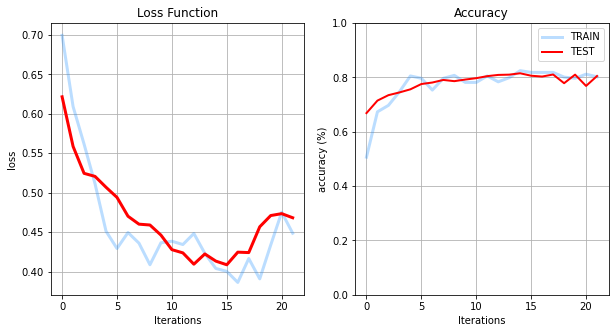

In [5]:
myModel = myNeural(hidden_size=486-50+11, act_func_1=nn.Tanh, act_func_2=nn.Tanh)

myModel.trainModel(trainData, testData,
                  lr = 1.3904031481028276,
                  epoch = 1, batch_size = 412+50)

myModel.trainer.plotTraining()

In [7]:
myModel.trainer.trainingStats

{'AvgTrainLoss': tensor(0.4589, grad_fn=<DivBackward0>),
 'MaxTrainLoss': tensor(0.6994, grad_fn=<BinaryCrossEntropyWithLogitsBackward>),
 'AvgTestAcc': tensor(0.7800),
 'negAvgTestAcc': tensor(-0.7800),
 'negRegAvgTestAcc': tensor(-0.7038)}